In [2]:
import pandas as pd
import math
from pandas_datareader import data, wb
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.widgets import TextBox

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

In [3]:
#pip install pandas_datareader

In [5]:
df = pd.read_csv('Pharmaceutical- companies-SE-2020.csv', index_col = 0)
df.head()

PFIZER_High  PFIZER_Low  PFIZER_Open  PFIZER_Close  PFIZER_Volume  \
Date                                                                        
1/2/20    37.333965   36.888046    37.286530     37.134724       16514072   
1/3/20    37.229603   36.688805    36.736244     36.935486       14922848   
1/6/20    37.001900   36.717270    36.831120     36.888046       15771951   
1/7/20    37.125237   36.698292    37.115749     36.764706       20108107   
1/8/20    37.210625   36.764706    36.774193     37.058823       16403507   

        PFIZER_AdjClose  PFIZER_Variation  ASTRAZENECA_High  ASTRAZENECA_Low  \
Date                                                                           
1/2/20        35.677311         -0.151806         50.490002        50.130001   
1/3/20        35.485886          0.199242         50.380001        49.830002   
1/6/20        35.440311          0.056927         50.220001        49.740002   
1/7/20        35.321815         -0.351044         50.299999        49.869999   
1/8/20        35.604385          0.284630         50.169998        49.750000   

        ASTRAZENECA_Open  ...  MODERNA_Volume  MODERNA_AdjClose  \
Date                      ...                                     
1/2/20         50.299999  ...         1233600         19.230000   
1/3/20         49.880001  ...         1751000         18.889999   
1/6/20         50.040001  ...         1606500         18.129999   
1/7/20         50.139999  ...         1461400         17.780001   
1/8/20         49.869999  ...         1041600         17.980000   

        MODERNA_Variation  NOVAVAX_High  NOVAVAX_Low  NOVAVAX_Open  \
Date                                                                 
1/2/20          -0.340000          4.57         3.86          3.99   
1/3/20          -0.130001          4.60         4.21          4.47   
1/6/20          -0.570002          4.72         4.36          4.41   
1/7/20          -0.369999          4.66         4.53          4.60   
1/8/20          -0.010000          4.60         4.26          4.56   

        NOVAVAX_Close  NOVAVAX_Volume  NOVAVAX_AdjClose  NOVAVAX_Variation  
Date                                                                        
1/2/20           4.49         6124200              4.49               0.50  
1/3/20           4.44         1709000              4.44              -0.03  
1/6/20           4.58         2111700              4.58               0.17  
1/7/20           4.57         1024000              4.57              -0.03  
1/8/20           4.28         1790100              4.28              -0.28  

[5 rows x 35 columns]

### Exploratory Data Analysis

In [4]:
tickers = ['PFIZER', 'ASTRAZENECA', 'BIONTECH', 'MODERNA', 'NOVAVAX']

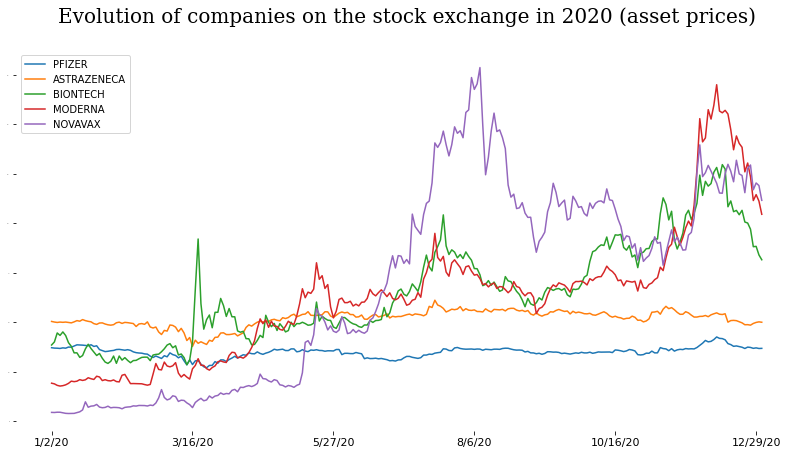

In [5]:
for i in tickers:
    df[i+'_Close'].plot(figsize=(14,7), legend=True, label=i)
    plt.title('Evolution of companies on the stock exchange in 2020 (asset prices)\n', fontsize=20, fontfamily='serif')
    plt.box(False)
    plt.xticks(rotation=360, fontsize=11)
    plt.yticks(fontsize=0)
    plt.xlabel('')

#### Moving Average

In [6]:
for i in tickers:
    print(f'{i}\nMax: {df[i+"_Close"].max():.2f}\nMin: {df[i+"_Close"].min():.2f}\n\n')

PFIZER
Max: 42.56
Min: 27.03


ASTRAZENECA
Max: 61.10
Min: 37.79


BIONTECH
Max: 129.54
Min: 28.55


MODERNA
Max: 169.86
Min: 17.78


NOVAVAX
Max: 178.51
Min: 3.93




In [7]:
df["PFIZER_Close"].mean()

34.957604524782596

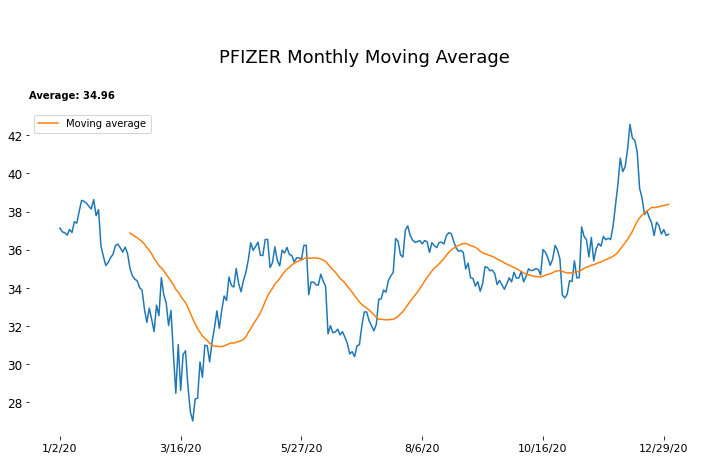

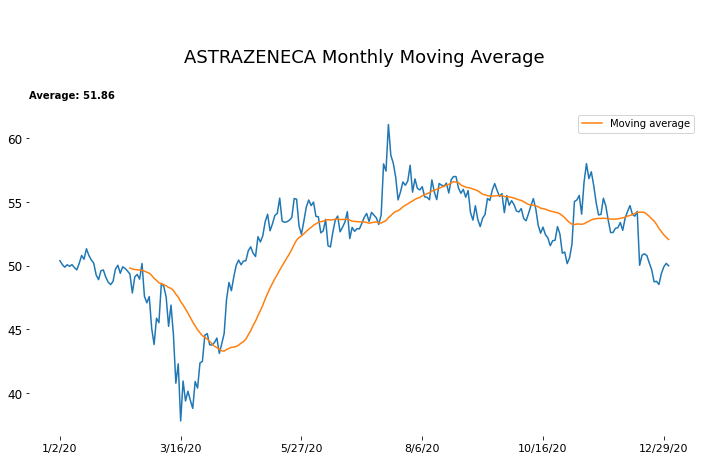

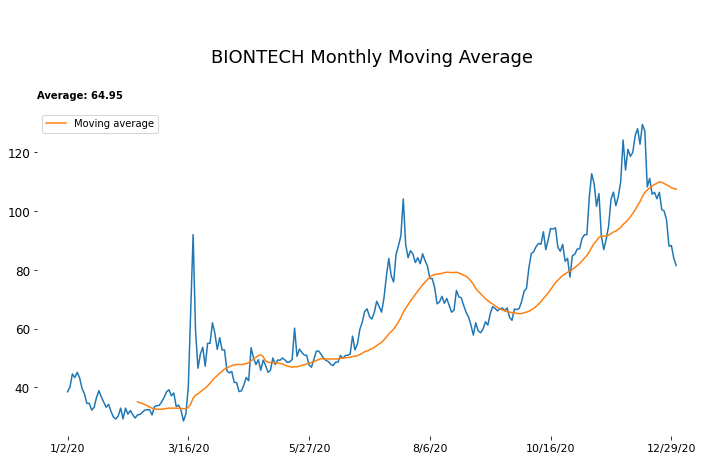

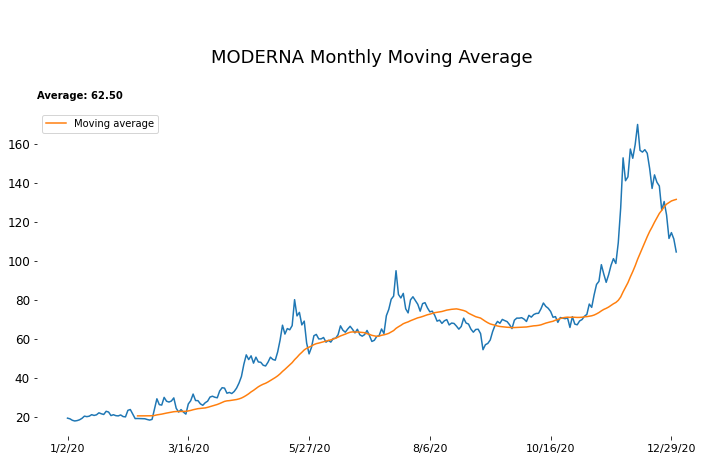

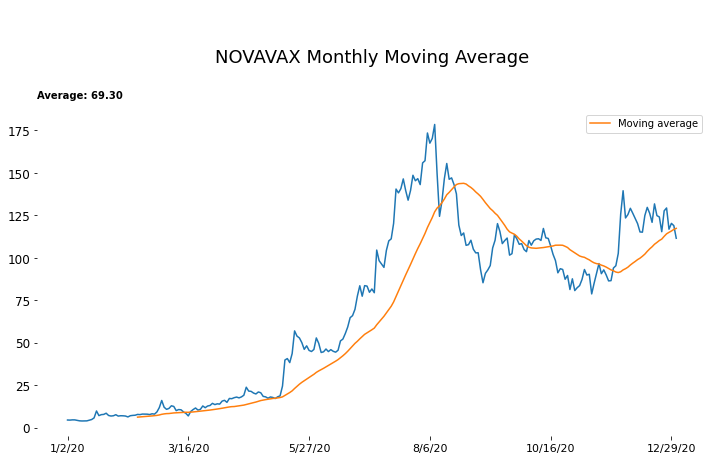

In [8]:
for i in tickers:
    ax = plt.subplots(1,1, figsize=(12,6))
    df[i+'_Close'].plot()
    ax2 = df[i+'_Close'].rolling(30).mean().plot(legend=True, label='Moving average')
    plt.title(f'\n\n{i} Monthly Moving Average\n\n',fontsize=18)
    plt.text(0,1,f'Average: {df[i+"_Close"].mean():.2f}\n',transform=ax2.transAxes,fontweight='bold')
    #plt.annotate(f'{df[i+"_Close"].max():.2f}',(mdates.date2num(df[i+"_Close"].idxmax()),df[i+"_Close"].max()), fontweight='bold')
    #plt.annotate(f'{df[i+"_Close"].min():.2f}',(mdates.date2num(df[i+"_Close"].idxmin()),df[i+"_Close"].min()), fontweight='bold')
    plt.box(False)
    plt.xticks(rotation=360)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=11)
    plt.xlabel('')

#### Variation

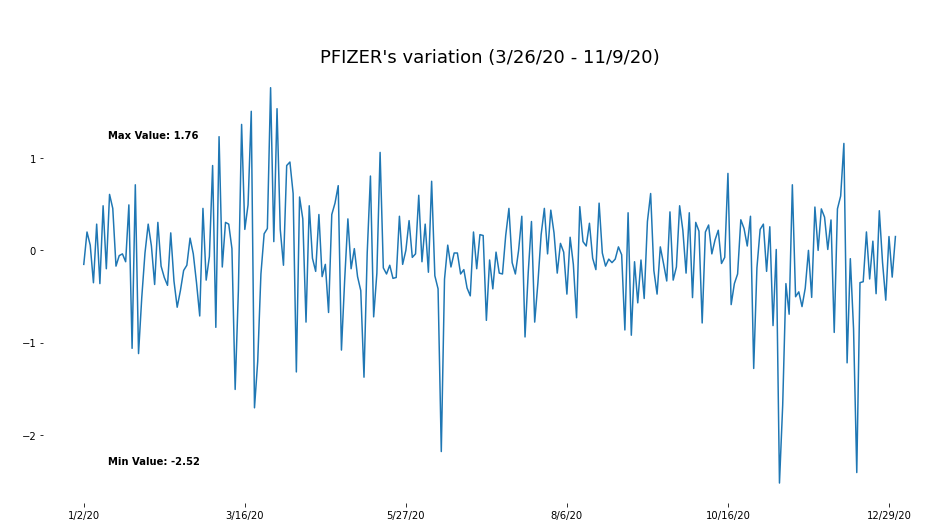

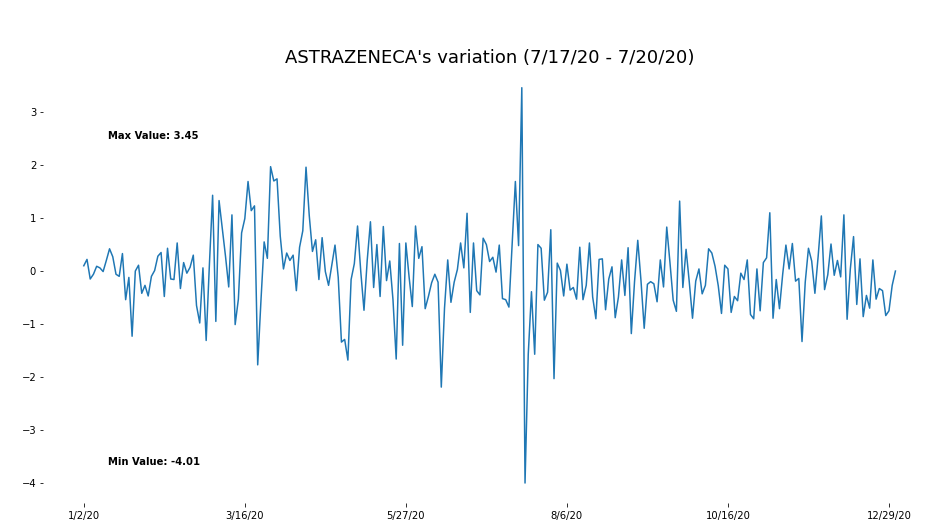

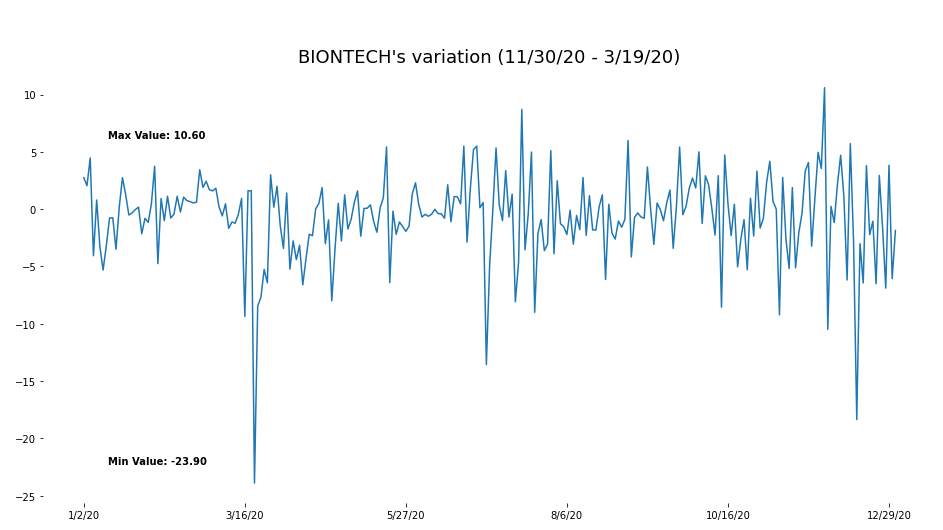

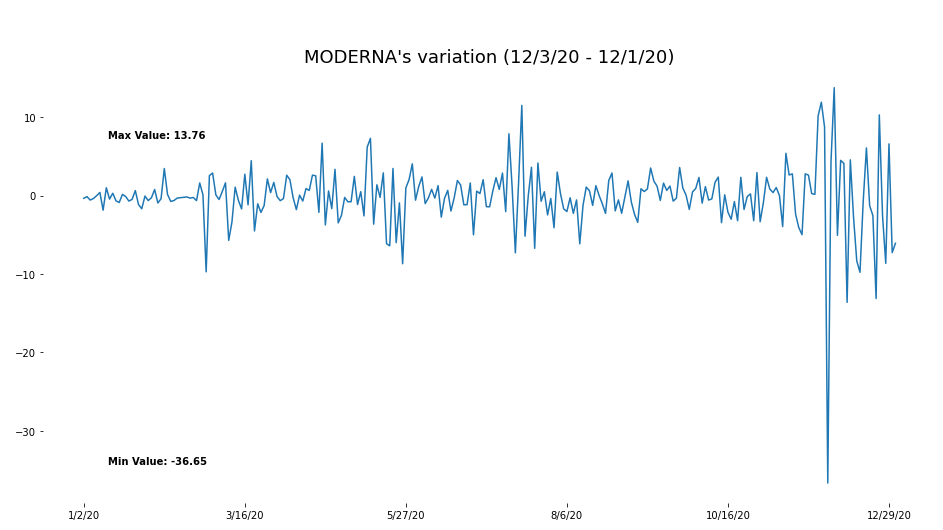

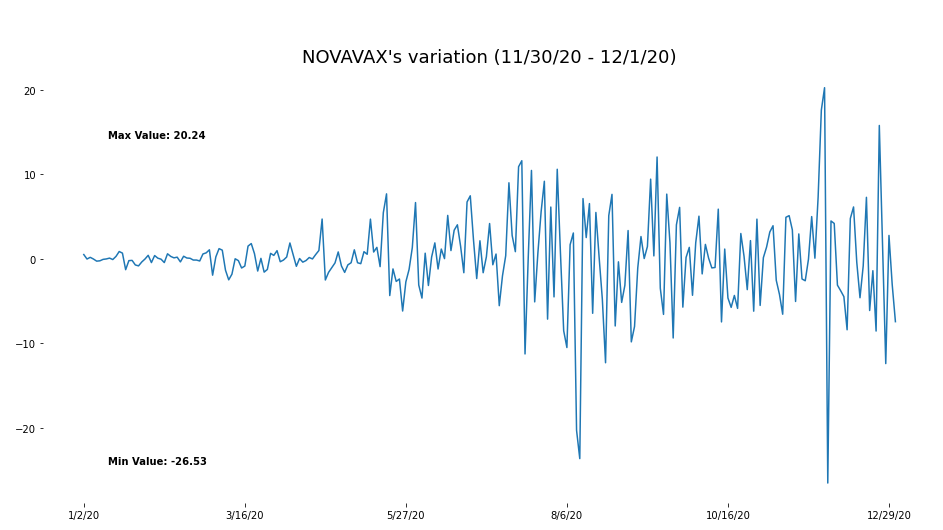

In [9]:
for i in tickers:
    ax = plt.subplots(1,1, figsize=(16,8))
    df[i+'_Variation'].plot()
    max_date = str(df[i+ '_Variation'].idxmax())[:10]
    min_date = str(df[i+'_Variation'].idxmin())[:10]
    plt.title(f"\n\n{i}'s variation ({max_date} - {min_date})", fontsize=18)
    
    max_val = df[i+'_Variation'].max()
    d = mdates.date2num(datetime.datetime.strptime(df[i+'_Variation'].idxmax(), '%m/%d/%y'))
    
    plt.text(0,1,f'Max Value: {max_val:.2f}\n',transform=ax2.transAxes,fontweight='bold')
    
    min_val = df[i+'_Variation'].min()
    min_d = mdates.date2num(datetime.datetime.strptime(df[i+'_Variation'].idxmin(), '%m/%d/%y'))
    
    plt.text(0,0,f'Min Value: {min_val:.2f}\n',transform=ax2.transAxes,fontweight='bold')
    
    plt.xticks(rotation=360)
    plt.box(False)
    plt.xlabel('')
    
    plt.show()

In [10]:
for i in tickers:
    col_name = i+'_Variation'
    print(f'{i}\n\nMax variation:\n{df[col_name].max()}\n\nMin variation:\n{df[col_name].min()}\n------------------------------\n')

PFIZER

Max variation:
1.764705658

Min variation:
-2.523719788
------------------------------

ASTRAZENECA

Max variation:
3.449996948

Min variation:
-4.009998322
------------------------------

BIONTECH

Max variation:
10.59999847

Min variation:
-23.89999771
------------------------------

MODERNA

Max variation:
13.75999451

Min variation:
-36.65000916
------------------------------

NOVAVAX

Max variation:
20.23999786

Min variation:
-26.52999878
------------------------------



#### Volatility

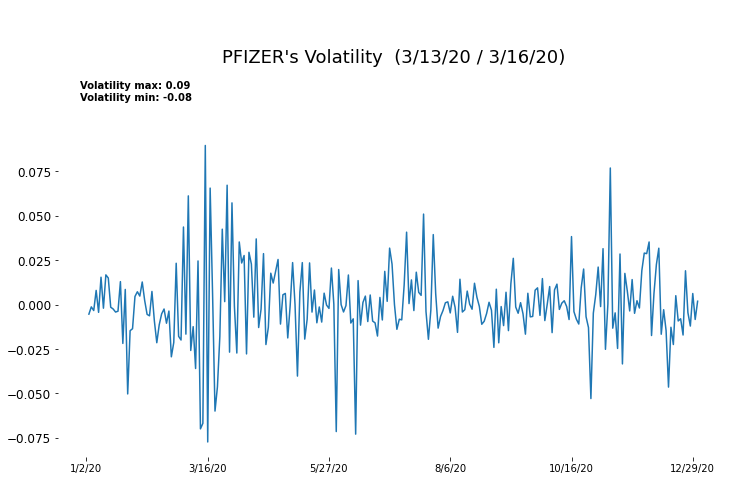

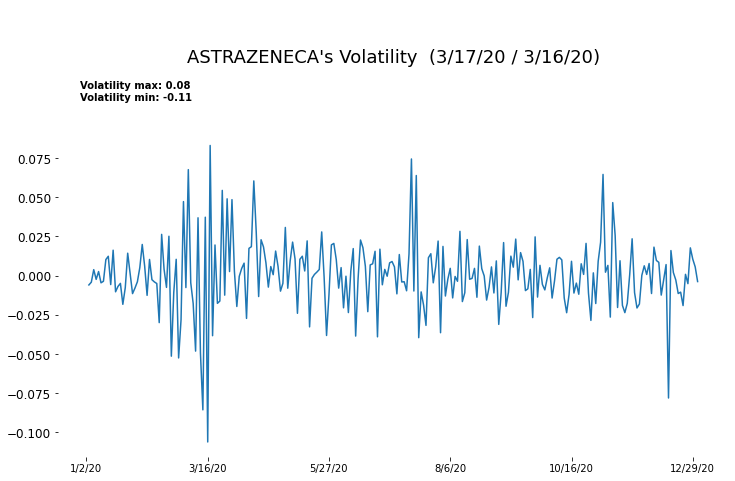

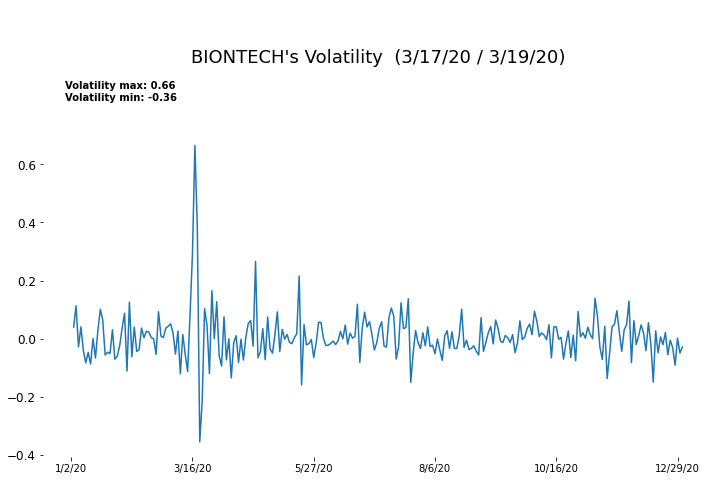

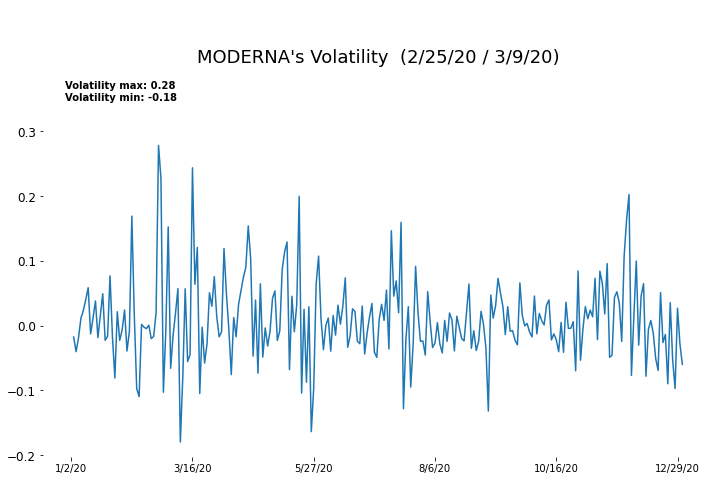

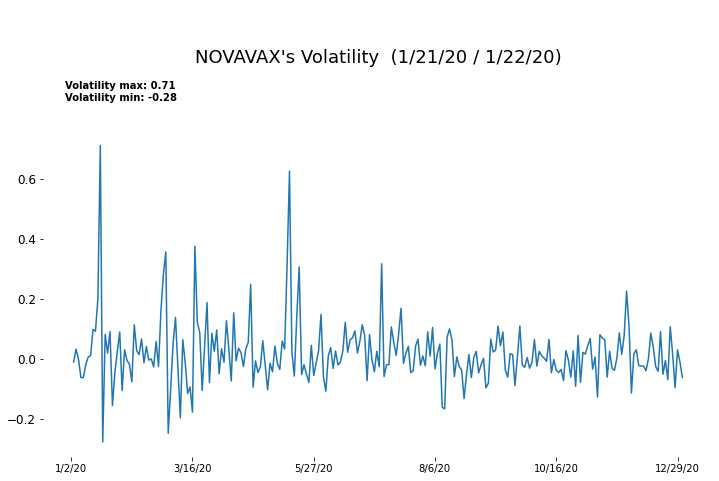

In [11]:
for i in tickers:
    fig,ax = plt.subplots(1,1,figsize=(12,6))
    col_name = i+'_Close'
    df[col_name].pct_change().plot()
    plt.title(f"\n\n{i}'s Volatility  ({str(df[col_name].pct_change().idxmax())[:10]} / {str(df[col_name].pct_change().idxmin())[:10]})\n\n\n", fontsize=18)
    fig.text(0.15,0.95, f'Volatility max: {df[col_name].pct_change().max():.2f}\nVolatility min: {df[col_name].pct_change().min():.2f}', fontweight='bold')
    plt.xticks(rotation=360, fontsize=10)
    plt.box(False)
    plt.yticks(fontsize=12)
    plt.xlabel('')
    plt.show()

#### Correlation of Prices

In [12]:
corr_df = pd.DataFrame()
for i in tickers:
    corr_df[i] = df[i+'_Close']
corr_df.corr()

PFIZER  ASTRAZENECA  BIONTECH   MODERNA   NOVAVAX
PFIZER       1.000000     0.494013  0.425656  0.512606  0.351220
ASTRAZENECA  0.494013     1.000000  0.437091  0.489729  0.685300
BIONTECH     0.425656     0.437091  1.000000  0.890670  0.791538
MODERNA      0.512606     0.489729  0.890670  1.000000  0.769017
NOVAVAX      0.351220     0.685300  0.791538  0.769017  1.000000

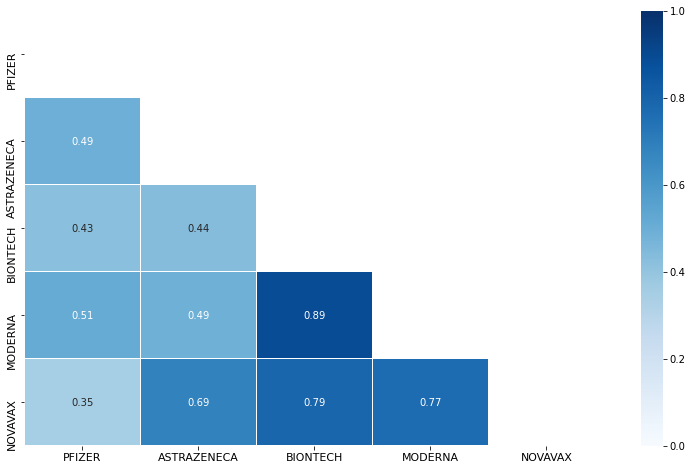

In [13]:
fig = plt.figure(figsize=(13,8))
mask = np.zeros_like(corr_df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df.corr(), annot=True, cmap='Blues', linewidths=0.2, mask=mask, vmin=0, vmax=1)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

#### Correlation of Volatality

In [14]:
vol_df = pd.DataFrame()
for i in tickers:
    vol_df[i] = df[i+'_Close'].pct_change()
vol_df.corr()

PFIZER  ASTRAZENECA  BIONTECH   MODERNA   NOVAVAX
PFIZER       1.000000     0.508017  0.364203  0.135615  0.118756
ASTRAZENECA  0.508017     1.000000  0.184752  0.101303  0.119653
BIONTECH     0.364203     0.184752  1.000000  0.372439  0.281482
MODERNA      0.135615     0.101303  0.372439  1.000000  0.220228
NOVAVAX      0.118756     0.119653  0.281482  0.220228  1.000000

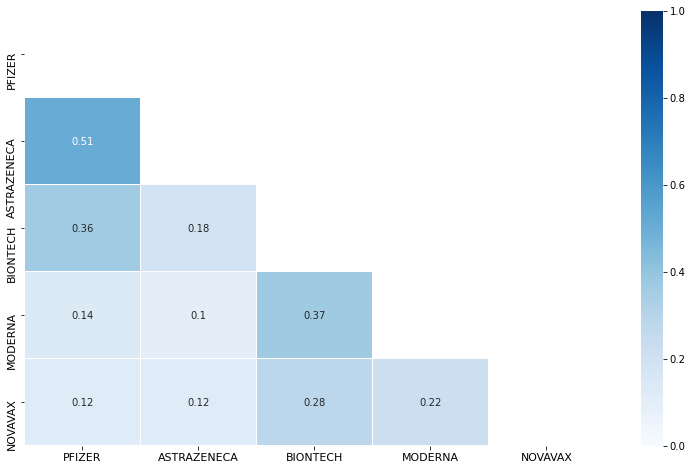

In [15]:
fig = plt.figure(figsize=(13,8))
mask = np.zeros_like(vol_df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(vol_df.corr(), annot=True, cmap='Blues', linewidths=0.2, mask=mask, vmin=0, vmax=1)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

#### Correlation between Variations of Tickers

In [16]:
var_df = pd.DataFrame()
for i in tickers:
    var_df[i] = df[i+'_Variation']
var_df.corr()

PFIZER  ASTRAZENECA  BIONTECH   MODERNA   NOVAVAX
PFIZER       1.000000     0.418895  0.368425  0.228515  0.168529
ASTRAZENECA  0.418895     1.000000  0.136768  0.254014  0.250851
BIONTECH     0.368425     0.136768  1.000000  0.439659  0.373675
MODERNA      0.228515     0.254014  0.439659  1.000000  0.608243
NOVAVAX      0.168529     0.250851  0.373675  0.608243  1.000000

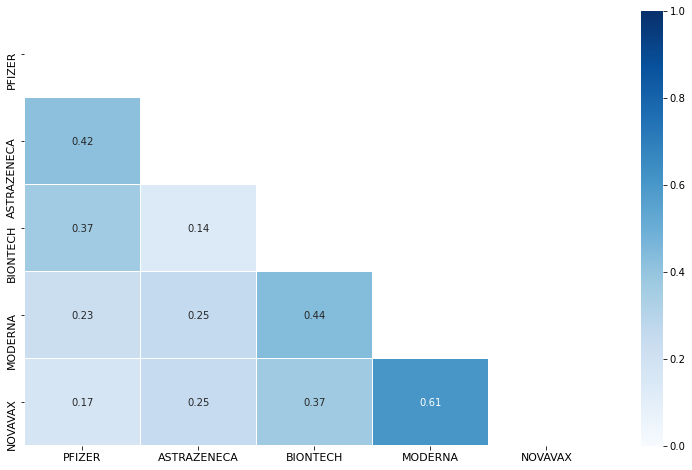

In [17]:
fig = plt.figure(figsize=(13,8))
mask = np.zeros_like(var_df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(var_df.corr(), annot=True, cmap='Blues', linewidths=0.2, mask=mask, vmin=0, vmax=1)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

In [ ]:
#####################################

In [59]:
d = datetime.datetime.strptime(df["PFIZER_Close"].pct_change().idxmax(), '%m/%d/%y')
f = d.strftime('%-m/%d/%y')
f

'3/13/20'

In [57]:
type(f)

str

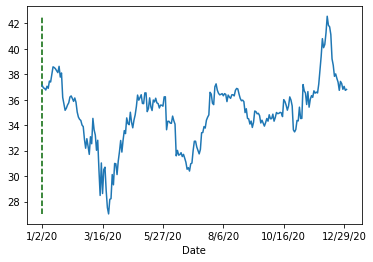

In [60]:
df['PFIZER_Close'].plot()
plt.vlines(x=f,ymin=df["PFIZER_Close"].min(), ymax=df["PFIZER_Close"].max(), color='darkgreen', linestyles='dashed')

In [45]:
df["PFIZER_Close"].pct_change().idxmax()

'3/13/20'

In [241]:
f'{str(df["PFIZER_Close"].pct_change().idxmax())}'

'3/13/20'

In [ ]:
###############################

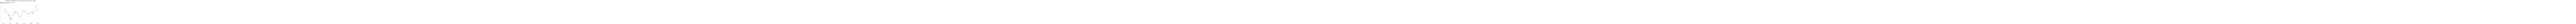

In [248]:
nl = '\n'
ax, fig = plt.subplots(1,1,figsize=(14,7))
df['PFIZER_Close'].plot()
plt.title('Evolution of PFIZER on stock exchange in 2020 (asset prices)\n\n', fontsize=20, fontfamily='serif')
plt.box(False)
ax.text(0.1,0.9,f'Highest price day: {str(df["PFIZER_Close"].pct_change().idxmax())[:10]} // Lowest price day: {str(df["PFIZER_Close"].pct_change().idxmin())[:10]}\nHighest volatility price day: {str(df["PFIZER_Close"].pct_change().idxmax())[:10]}',fontweight='bold', fontfamily='serif')
plt.annotate(f'{df["PFIZER_Close"].max():.2f}',(mdates.date2num(datetime.datetime.strptime(df["PFIZER_Close"].idxmax(), '%m/%d/%y')),df["PFIZER_Close"].max()), fontweight='bold')
plt.annotate(f'{df["PFIZER_Close"].min():.2f}',(mdates.date2num(datetime.datetime.strptime(df["PFIZER_Close"].idxmin(), '%m/%d/%y')),df["PFIZER_Close"].min()), fontweight='bold')
#plt.vlines(x=f'{str(df["PFIZER_Close"].pct_change().idxmax())}',ymin=df["PFIZER_Close"].min(), ymax=df["PFIZER_Close"].max(), color='darkgreen', linestyles='dashed')
# designdate = '3/13/2020'
# plt.vlines(x = pd.to_datetime(designdate), ymin=df["PFIZER_Close"].min(), ymax=df["PFIZER_Close"].max(), linestyles='dashed')
#plt.annotate('      "Pfizer issued a five-point plan calling on the biopharmaceutical industry \nto join the company in committing to collaboration to combat COVID-19.  \nPfizer Inc. and BioNTech announced that the companies have agreed to a letter of intent \nregarding the co-development and distribution (excluding China) of a potential \nmRNA-based coronavirus vaccine aimed at preventing COVID-19 infection."',(df["PFIZER_Close"].pct_change().idxmin(),df["PFIZER_Close"].min()+12),fontfamily='serif', fontsize=11)
plt.xticks(rotation=360, fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel('')
plt.show()

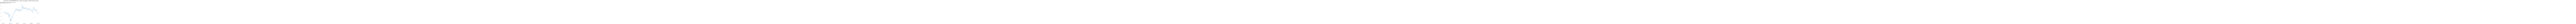

In [253]:
nl = '\n'
ax, fig = plt.subplots(1,1,figsize=(14,7))
df['ASTRAZENECA_Close'].plot()
plt.title('Evolution of ASTRAZENECA on stock exchange in 2020 (asset prices)\n\n', fontsize=20, fontfamily='serif')
plt.box(False)
ax.text(0.1,0.9,f'Highest price day: {str(df["ASTRAZENECA_Close"].pct_change().idxmax())[:10]} // Lowest price day: {str(df["ASTRAZENECA_Close"].pct_change().idxmin())[:10]}\nHighest volatility price day: {str(df["ASTRAZENECA_Close"].pct_change().idxmax())[:10]}',fontweight='bold', fontfamily='serif')
plt.annotate(f'{df["ASTRAZENECA_Close"].max():.2f}',(mdates.date2num(datetime.datetime.strptime(df["ASTRAZENECA_Close"].idxmax(), '%m/%d/%y')),df["ASTRAZENECA_Close"].max()), fontweight='bold')
plt.annotate(f'{df["ASTRAZENECA_Close"].min():.2f}',(mdates.date2num(datetime.datetime.strptime(df["ASTRAZENECA_Close"].idxmin(), '%m/%d/%y')),df["ASTRAZENECA_Close"].min()), fontweight='bold')
#plt.vlines(x=str(df["ASTRAZENECA_Close"].pct_change().idxmax()),ymin=df["ASTRAZENECA_Close"].min(), ymax=df["ASTRAZENECA_Close"].max(), color='darkgreen', linestyles='dashed')
#plt.annotate('      "AstraZeneca reported that high-level data analysis from \nits Phase III CASPIAN trial demonstrated that Imfinzi \n(durvalumab) in combination with standard-of-care (SoC) \nchemotherapies confirmed a clinically meaningful and sustained \noverall survival (OS) benefit in patients with extensive-stage small \ncell lung cancer (ES-SCLC) treated in the first-line setting."',(df["ASTRAZENECA_Close"].pct_change().idxmin(),df["ASTRAZENECA_Close"].min()+16),fontfamily='serif', fontsize=11)
plt.xticks(rotation=360, fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel('')
plt.show()

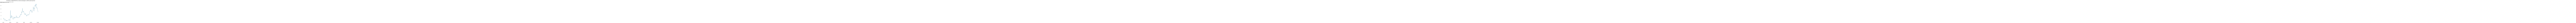

In [259]:
ax, fig = plt.subplots(1,1,figsize=(16,8))
df['BIONTECH_Close'].plot()
plt.title('Evolution of BIONTECH on stock exchange in 2020 (asset prices)\n\n', fontsize=20, fontfamily='serif')
plt.box(False)
ax.text(0.1,0.9,f'Highest price day: {str(df["BIONTECH_Close"].pct_change().idxmax())[:10]} // Lowest price day: {str(df["BIONTECH_Close"].pct_change().idxmin())[:10]}\nHighest volatility price day: {str(df["BIONTECH_Close"].pct_change().idxmax())[:10]}',fontweight='bold', fontfamily='serif')
plt.annotate(f'{df["BIONTECH_Close"].max():.2f}',(mdates.date2num(datetime.datetime.strptime(df["BIONTECH_Close"].idxmax(), '%m/%d/%y')),df["BIONTECH_Close"].max()), fontweight='bold')
plt.annotate(f'{df["BIONTECH_Close"].min():.2f}',(mdates.date2num(datetime.datetime.strptime(df["BIONTECH_Close"].idxmin(), '%m/%d/%y')),df["BIONTECH_Close"].min()-2), fontweight='bold')
#plt.vlines(x=f'{str(df["BIONTECH_Close"].pct_change().idxmax())}',ymin=df["BIONTECH_Close"].min(), ymax=110, color='darkgreen', linestyles='dashed')
#plt.annotate('      "Pfizer issued a five-point plan calling on the biopharmaceutical industry \nto join the company in committing to collaboration to combat COVID-19.  \nPfizer Inc. and BioNTech announced that the companies have agreed to a letter of intent \nregarding the co-development and distribution (excluding China) of a potential \nmRNA-based coronavirus vaccine aimed at preventing COVID-19 infection."',(int(mdates.date2num(df["BIONTECH_Close"].pct_change().idxmin())-50),df["BIONTECH"]["Close"].min()+85),fontfamily='serif', fontsize=11)
plt.xticks(rotation=360, fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel('')
plt.show()

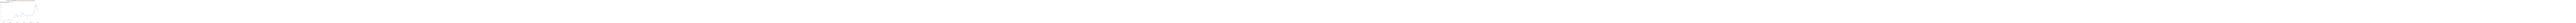

In [262]:
ax, fig = plt.subplots(1,1, figsize=(16,8))
df['MODERNA_Close'].plot()
plt.title('Evolution of MODERNA on stock exchange in 2020 (asset prices)\n\n', fontsize=20, fontfamily='serif')
plt.box(False)
ax.text(0.1,0.9, f'Highest price day: {str(df["MODERNA_Close"].idxmax())[:10]} // Lowest price day: {str(df["MODERNA_Close"].idxmin())[:10]}\nHighest volatility price day: {str(df["MODERNA_Close"].pct_change().idxmax())[:10]}', fontfamily='serif',fontweight='bold',fontsize=10)
plt.annotate(f'{df["MODERNA_Close"].max():.2f}',(mdates.date2num(datetime.datetime.strptime(df["MODERNA_Close"].idxmax(),'%m/%d/%y')),df["MODERNA_Close"].max()), fontweight='bold')
plt.annotate(f'{df["MODERNA_Close"].min():.2f}',(mdates.date2num(datetime.datetime.strptime(df["MODERNA_Close"].idxmin(),'%m/%d/%y')),df["MODERNA_Close"].min()-2), fontweight='bold')
#plt.vlines(x=f'{str(df["MODERNA"]["Close"].pct_change().idxmax())}',ymin=df["MODERNA"]["Close"].min(), ymax=122, color='darkgreen', linestyles='dashed')
#plt.annotate('      "US biotech firm Moderna has shipped an\n  experimental coronavirus vaccine to US\n  government  researchers just six weeks after\n  it started working on the immunization."',(mdates.date2num(df["MODERNA"]["Close"].idxmin()),df["MODERNA"]["Close"].min()+115),fontfamily='serif', fontsize=12)
plt.xticks(rotation=360, fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel('')
plt.show()

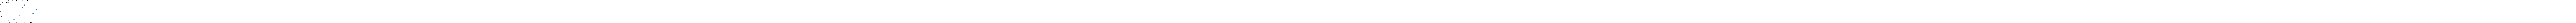

In [264]:
ax, fig = plt.subplots(1,1,figsize=(16,8))
df['NOVAVAX_Close'].plot()
plt.title('Evolution of NOVAVAX on stock exchange in 2020 (asset prices)\n\n', fontsize=20, fontfamily='serif')
plt.box(False)
ax.text(0.1,0.9, f'Highest price day: {str(df["NOVAVAX_Close"].idxmax())[:10]} // Lowest price day: {str(df["NOVAVAX_Close"].idxmin())[:10]}\nHighest volatility price day: {str(df["NOVAVAX_Close"].pct_change().idxmax())[:10]}', fontfamily='serif',fontweight='bold')
plt.annotate(f'{df["NOVAVAX_Close"].max():.2f}',(mdates.date2num(datetime.datetime.strptime(df["NOVAVAX_Close"].idxmax(), '%m/%d/%y')),df["NOVAVAX_Close"].max()), fontweight='bold')
plt.annotate(f'{df["NOVAVAX_Close"].min():.2f}',(mdates.date2num(datetime.datetime.strptime(df["NOVAVAX_Close"].idxmin(), '%m/%d/%y')),df["NOVAVAX_Close"].min()-2), fontweight='bold')
#plt.vlines(x=f'{str(df["NOVAVAX"]["Close"].pct_change().idxmax())}',ymin=df["NOVAVAX"]["Close"].min(), ymax=115, color='darkgreen', linestyles='dashed')
#plt.annotate('    "In response to the emergence of a new coronavirus \nseen recently in China, and now America, Novavax Inc. \nhas initiated development of a vaccine candidate, \nthe company told BioWorld."',(int(mdates.date2num(df["NOVAVAX"]["Close"].idxmin())-10),df["NOVAVAX"]["Close"].min()+115),fontfamily='serif', fontsize=12)

plt.xticks(rotation=360, fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel('')
plt.show()

### LSTM

In [6]:
def createDf(ticker):
    cols = [ticker+'_Open', ticker+'_Close']
    df_new = df[cols]
    df_new = df_new.reset_index()
    df_new.drop('Date', inplace = True, axis = 1)
    return df_new

In [107]:
def normalizeDf(df):
    scaler = MinMaxScaler()
    df[df.columns] = scaler.fit_transform(df)
    return df,scaler

In [8]:
def train_test_splitDf(df):
    train = df.iloc[:200,:]
    test = df.iloc[200:,:]
    return train, test

In [9]:
def seq_gen(df, ticker):
    X = df[[ticker+'_Open', ticker+'_Close']].reset_index(drop=True)
    y = df[[ticker+'_Open', ticker+'_Close']].reset_index(drop=True)

    seq = []
    labels = []
    index = 0
    
    seq_length = 10
    while index != X.iloc[-seq_length:].index[0]:
        start = index
        stop = index+seq_length
        new = np.array(X.iloc[start:stop])
        label = np.array(y.iloc[stop])
        seq.append(new)
        labels.append(label)
        start += 1
        stop += 1
        index += 1

    seq = np.array(seq)
    labels = np.array(labels)
    labels = labels.reshape(labels.shape[0], -1)

    return(seq, labels)

In [17]:
# Initializing model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (10, 2)))
regressor.add(Dropout(0.2))             

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 2))


regressor.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 2)                 1

In [18]:
def plot_preds(preds, labels):
    open_pred = [i[0] for i in preds]
    open_actual = [i[0] for i in labels]
    plt.plot(np.arange(len(open_actual)), open_actual, label='actual')
    plt.plot(np.arange(len(open_pred)), open_pred, label='predicted')
    plt.title('Open')
    plt.legend()
    plt.show()

    close_pred = [i[1] for i in preds]
    close_actual = [i[1] for i in labels]
    plt.plot(np.arange(len(close_actual)), close_actual, label='actual')
    plt.plot(np.arange(len(close_pred)), close_pred, label='predicted')
    plt.title('Close')
    plt.legend()
    plt.show()

In [19]:
def plot_forecast(latest_prediction, test_pred, test_labels):
    open_next = [i[0][0] for i in latest_prediction]
    open_pred = [i[0] for i in test_pred]
    open_actual = [i[0] for i in test_labels]
    plt.plot(np.arange(len(open_actual)), open_actual, label='actual')
    plt.plot(np.arange(len(open_pred)), open_pred, label='predicted')
    plt.plot(np.arange(len(open_pred), len(open_pred)+len(open_next)), open_next, label='upcoming 5 days predicted')
    plt.title('Open')
    plt.legend()
    plt.show()

    close_next = [i[0][1] for i in latest_prediction]
    close_pred = [i[1] for i in test_pred]
    close_actual = [i[1] for i in test_labels]
    plt.plot(np.arange(len(close_actual)), close_actual, label='actual')
    plt.plot(np.arange(len(close_pred)), close_pred, label='predicted')
    plt.plot(np.arange(len(close_pred), len(close_pred)+len(close_next)), close_next, label='upcoming 5 days predicted')
    plt.title('Close')
    plt.legend()
    plt.show()

#### PFIZER

In [20]:
df_pfizer = createDf('PFIZER')
df_pfizer.head()

PFIZER_Open  PFIZER_Close
0    37.286530     37.134724
1    36.736244     36.935486
2    36.831120     36.888046
3    37.115749     36.764706
4    36.774193     37.058823

In [34]:
df_pfizer,pfi_scaler = normalizeDf(df_pfizer)
df_pfizer.head()

PFIZER_Open  PFIZER_Close
0     0.633574      0.650650
1     0.598710      0.637821
2     0.604721      0.634766
3     0.622754      0.626824
4     0.601114      0.645763

In [22]:
df_pfizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PFIZER_Open   253 non-null    float64
 1   PFIZER_Close  253 non-null    float64
dtypes: float64(2)
memory usage: 4.1 KB


In [23]:
train_p, test_p = train_test_splitDf(df_pfizer)

In [24]:
train_seq_p, train_labels_p = seq_gen(train_p, 'PFIZER')
test_seq_p, test_labels_p = seq_gen(test_p, 'PFIZER')

In [25]:
train_seq_p.shape, train_labels_p.shape, test_seq_p.shape, test_labels_p.shape

((190, 10, 2), (190, 2), (43, 10, 2), (43, 2))

In [26]:
# Model training
epochs = 200
batch_size = 8

# fit the network
history = regressor.fit(train_seq_p, train_labels_p, epochs=epochs, batch_size=batch_size, validation_data=(test_seq_p, test_labels_p), verbose=1)

Epoch 1/200
24/24 [==============================] - 6s 63ms/step - loss: 0.0609 - mean_absolute_error: 0.1999 - val_loss: 0.0679 - val_mean_absolute_error: 0.2276
Epoch 2/200
24/24 [==============================] - 0s 11ms/step - loss: 0.0161 - mean_absolute_error: 0.1000 - val_loss: 0.0358 - val_mean_absolute_error: 0.1455
Epoch 3/200
24/24 [==============================] - 0s 11ms/step - loss: 0.0133 - mean_absolute_error: 0.0887 - val_loss: 0.0321 - val_mean_absolute_error: 0.1346
Epoch 4/200
24/24 [==============================] - 0s 11ms/step - loss: 0.0118 - mean_absolute_error: 0.0855 - val_loss: 0.0216 - val_mean_absolute_error: 0.1096
Epoch 5/200
24/24 [==============================] - 0s 11ms/step - loss: 0.0130 - mean_absolute_error: 0.0895 - val_loss: 0.0262 - val_mean_absolute_error: 0.1218
Epoch 6/200
24/24 [==============================] - 0s 11ms/step - loss: 0.0111 - mean_absolute_error: 0.0822 - val_loss: 0.0208 - val_mean_absolute_error: 0.1096
Epoch 7/200
24/2

Epoch 51/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0050 - mean_absolute_error: 0.0564 - val_loss: 0.0079 - val_mean_absolute_error: 0.0687
Epoch 52/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0053 - mean_absolute_error: 0.0576 - val_loss: 0.0105 - val_mean_absolute_error: 0.0830
Epoch 53/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0051 - mean_absolute_error: 0.0564 - val_loss: 0.0059 - val_mean_absolute_error: 0.0535
Epoch 54/200
24/24 [==============================] - 0s 19ms/step - loss: 0.0047 - mean_absolute_error: 0.0540 - val_loss: 0.0078 - val_mean_absolute_error: 0.0683
Epoch 55/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0046 - mean_absolute_error: 0.0536 - val_loss: 0.0074 - val_mean_absolute_error: 0.0654
Epoch 56/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0534 - val_loss: 0.0087 - val_mean_absolute_error: 0.0739
Epoch 57/2

Epoch 101/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0033 - mean_absolute_error: 0.0446 - val_loss: 0.0051 - val_mean_absolute_error: 0.0506
Epoch 102/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0030 - mean_absolute_error: 0.0413 - val_loss: 0.0056 - val_mean_absolute_error: 0.0540
Epoch 103/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0033 - mean_absolute_error: 0.0445 - val_loss: 0.0044 - val_mean_absolute_error: 0.0458
Epoch 104/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0027 - mean_absolute_error: 0.0399 - val_loss: 0.0048 - val_mean_absolute_error: 0.0484
Epoch 105/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0028 - mean_absolute_error: 0.0415 - val_loss: 0.0068 - val_mean_absolute_error: 0.0625
Epoch 106/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0034 - mean_absolute_error: 0.0446 - val_loss: 0.0033 - val_mean_absolute_error: 0.0400
Epoc

24/24 [==============================] - 0s 17ms/step - loss: 0.0018 - mean_absolute_error: 0.0311 - val_loss: 0.0037 - val_mean_absolute_error: 0.0401
Epoch 200/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0024 - mean_absolute_error: 0.0358 - val_loss: 0.0043 - val_mean_absolute_error: 0.0458


In [27]:
# Predictions
train_pred = regressor.predict(train_seq_p)
test_pred = regressor.predict(test_seq_p)

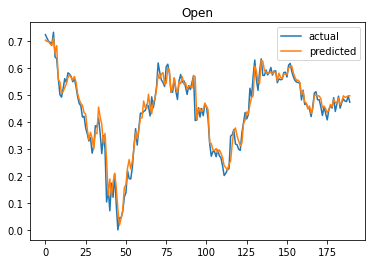

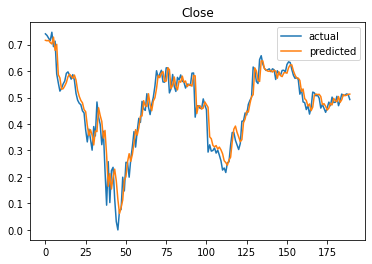

In [116]:
plot_preds(train_pred, train_labels_p)

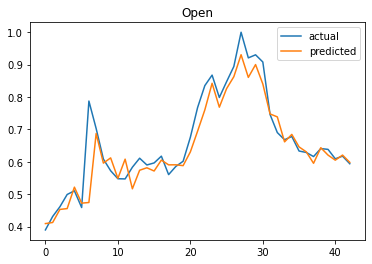

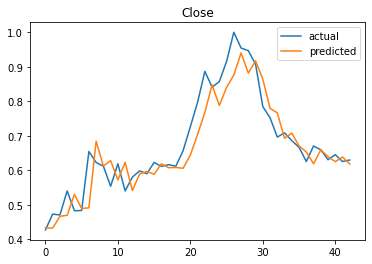

In [117]:
plot_preds(test_pred, test_labels_p)

In [29]:
# Predicting the prices of upcomming 5 days
latest_prediction = []
last_seq = test_seq_p[-1:]

i=0
while i!=5:
    prediction = regressor.predict(last_seq)
    latest_prediction.append(prediction)
    last_seq = np.append(last_seq[0][1:],prediction,axis=0)
    last_seq = last_seq.reshape(test_seq_p[-1:].shape)
    i += 1

In [71]:
import yfinance as yf
pfi_future = yf.download('PFE', 
                      start='2021-01-04', 
                      end='2021-01-08', 
                      progress=False,
)

In [72]:
pfi_future.drop(columns=['Date','High', 'Low', 'Adj Close', 'Volume'], inplace=True)

In [73]:
pfi_future

Open      Close
0  37.029999  36.740002
1  36.660000  36.810001
2  36.869999  36.810001
3  36.720001  37.189999
4  36.830002  36.869999
5  37.040001  37.060001
6  37.160000  37.130001

In [66]:
pfi_predicted = pfi_scaler.inverse_transform(np.stack(latest_prediction)[:, 0, :])

In [103]:
pfi_predicted

array([[36.951077, 37.01305 ],
       [36.943516, 37.0063  ],
       [36.93665 , 37.000008],
       [36.929943, 36.993797],
       [36.923336, 36.98765 ]], dtype=float32)

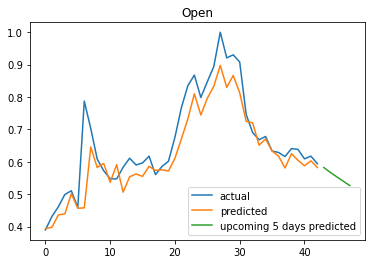

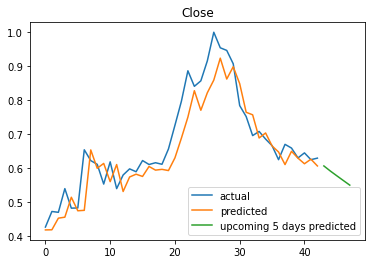

In [30]:
plot_forecast(latest_prediction, test_pred, test_labels_p)

#### ASTRAZENECA

In [111]:
df_astra = createDf('ASTRAZENECA')
df_astra.head()

ASTRAZENECA_Open  ASTRAZENECA_Close
0         50.299999          50.389999
1         49.880001          50.090000
2         50.040001          49.880001
3         50.139999          50.070000
4         49.869999          49.950001

In [112]:
df_astra,a_scaler = normalizeDf(df_astra)
df_astra.head()

ASTRAZENECA_Open  ASTRAZENECA_Close
0          0.521252           0.540541
1          0.505023           0.527671
2          0.511206           0.518662
3          0.515070           0.526813
4          0.504637           0.521665

In [113]:
df_astra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ASTRAZENECA_Open   253 non-null    float64
 1   ASTRAZENECA_Close  253 non-null    float64
dtypes: float64(2)
memory usage: 4.1 KB


In [114]:
train_a, test_a = train_test_splitDf(df_astra)

In [115]:
train_seq_a, train_labels_a = seq_gen(train_a, 'ASTRAZENECA')
test_seq_a, test_labels_a = seq_gen(test_a, 'ASTRAZENECA')

In [116]:
train_seq_a.shape, train_labels_a.shape, test_seq_a.shape, test_labels_a.shape

((190, 10, 2), (190, 2), (43, 10, 2), (43, 2))

In [117]:
# Model training
epochs = 200
batch_size = 8

# fit the network
history = regressor.fit(train_seq_a, train_labels_a, epochs=epochs, batch_size=batch_size, validation_data=(test_seq_a, test_labels_a), verbose=1)



Epoch 1/200
24/24 [==============================] - 0s 18ms/step - loss: 0.0031 - mean_absolute_error: 0.0418 - val_loss: 0.0021 - val_mean_absolute_error: 0.0323
Epoch 2/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0428 - val_loss: 0.0022 - val_mean_absolute_error: 0.0343
Epoch 3/200
24/24 [==============================] - 0s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0484 - val_loss: 0.0022 - val_mean_absolute_error: 0.0345
Epoch 4/200
24/24 [==============================] - 0s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0414 - val_loss: 0.0020 - val_mean_absolute_error: 0.0327
Epoch 5/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0034 - mean_absolute_error: 0.0429 - val_loss: 0.0021 - val_mean_absolute_error: 0.0332
Epoch 6/200
24/24 [==============================] - 0s 14ms/step - loss: 0.0024 - mean_absolute_error: 0.0376 - val_loss: 0.0021 - val_mean_absolute_error: 0.0320
Epoch 7/200
24/2

Epoch 51/200
24/24 [==============================] - 0s 11ms/step - loss: 0.0025 - mean_absolute_error: 0.0364 - val_loss: 0.0021 - val_mean_absolute_error: 0.0338
Epoch 52/200
24/24 [==============================] - 0s 11ms/step - loss: 0.0026 - mean_absolute_error: 0.0380 - val_loss: 0.0023 - val_mean_absolute_error: 0.0348
Epoch 53/200
24/24 [==============================] - 0s 11ms/step - loss: 0.0027 - mean_absolute_error: 0.0379 - val_loss: 0.0023 - val_mean_absolute_error: 0.0330
Epoch 54/200
24/24 [==============================] - 0s 11ms/step - loss: 0.0026 - mean_absolute_error: 0.0383 - val_loss: 0.0021 - val_mean_absolute_error: 0.0334
Epoch 55/200
24/24 [==============================] - 0s 11ms/step - loss: 0.0025 - mean_absolute_error: 0.0374 - val_loss: 0.0021 - val_mean_absolute_error: 0.0335
Epoch 56/200
24/24 [==============================] - 0s 11ms/step - loss: 0.0024 - mean_absolute_error: 0.0362 - val_loss: 0.0023 - val_mean_absolute_error: 0.0363
Epoch 57/2

Epoch 101/200
24/24 [==============================] - 0s 14ms/step - loss: 0.0023 - mean_absolute_error: 0.0343 - val_loss: 0.0022 - val_mean_absolute_error: 0.0332
Epoch 102/200
24/24 [==============================] - 0s 17ms/step - loss: 0.0025 - mean_absolute_error: 0.0370 - val_loss: 0.0023 - val_mean_absolute_error: 0.0353
Epoch 103/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0023 - mean_absolute_error: 0.0353 - val_loss: 0.0022 - val_mean_absolute_error: 0.0338
Epoch 104/200
24/24 [==============================] - 0s 14ms/step - loss: 0.0022 - mean_absolute_error: 0.0345 - val_loss: 0.0022 - val_mean_absolute_error: 0.0336
Epoch 105/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0022 - mean_absolute_error: 0.0347 - val_loss: 0.0025 - val_mean_absolute_error: 0.0370
Epoch 106/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0024 - mean_absolute_error: 0.0382 - val_loss: 0.0024 - val_mean_absolute_error: 0.0350
Epoc

24/24 [==============================] - 0s 15ms/step - loss: 0.0023 - mean_absolute_error: 0.0343 - val_loss: 0.0023 - val_mean_absolute_error: 0.0358
Epoch 200/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0024 - mean_absolute_error: 0.0353 - val_loss: 0.0022 - val_mean_absolute_error: 0.0338


In [118]:
# Predictions
train_pred = regressor.predict(train_seq_a)
test_pred = regressor.predict(test_seq_a)

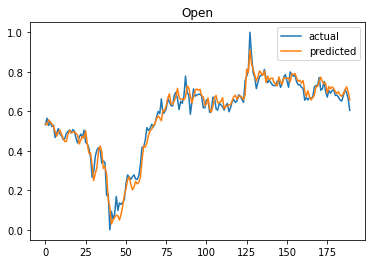

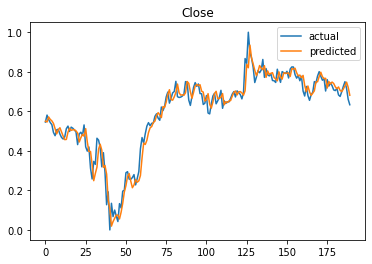

In [128]:
plot_preds(train_pred, train_labels_a)

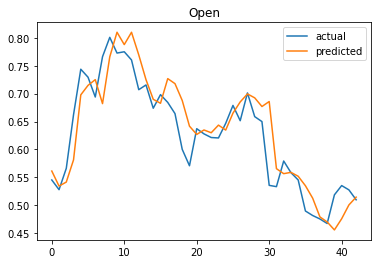

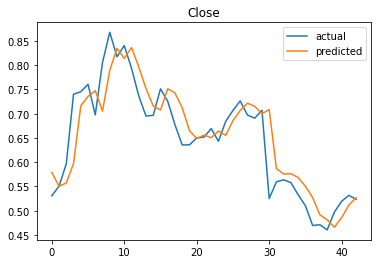

In [129]:
plot_preds(test_pred, test_labels_a)

In [119]:
# Predicting the prices of upcomming 5 days
latest_prediction = []
last_seq = test_seq_a[-1:]

In [120]:
i=0
while i!=5:
    prediction = regressor.predict(last_seq)
    latest_prediction.append(prediction)
    last_seq = np.append(last_seq[0][1:],prediction,axis=0)
    last_seq = last_seq.reshape(test_seq_a[-1:].shape)
    i += 1

In [127]:
import yfinance as yf
astra_future = yf.download('AZN', 
                      start='2021-01-02', 
                      end='2021-01-10', 
                      progress=False,
).reset_index()
astra_future.drop(columns=['Date','High', 'Low', 'Adj Close', 'Volume'], inplace=True)
astra_predicted = a_scaler.inverse_transform(np.stack(latest_prediction)[:, 0, :])

In [128]:
astra_future

Open      Close
0  50.919998  50.520000
1  50.400002  50.700001
2  50.840000  50.910000
3  50.549999  50.189999
4  50.590000  50.860001

In [125]:
astra_predicted

array([[50.42048 , 50.362736],
       [50.83194 , 50.76501 ],
       [51.222027, 51.140644],
       [51.48252 , 51.39514 ],
       [51.52234 , 51.438183]], dtype=float32)

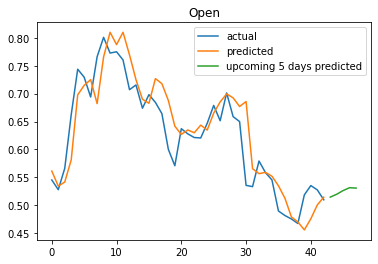

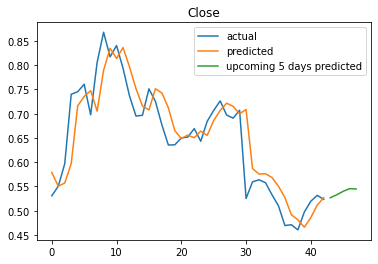

In [132]:
plot_forecast(latest_prediction, test_pred, test_labels_a)

#### MODERNA

In [129]:
df_moderna = createDf('MODERNA')
df_moderna.head()

MODERNA_Open  MODERNA_Close
0     19.570000      19.230000
1     19.020000      18.889999
2     18.700001      18.129999
3     18.150000      17.780001
4     17.990000      17.980000

In [130]:
df_moderna,mod_scaler = normalizeDf(df_moderna)
df_moderna.head()

MODERNA_Open  MODERNA_Close
0      0.009895       0.009534
1      0.006451       0.007299
2      0.004447       0.002301
3      0.001002       0.000000
4      0.000000       0.001315

In [131]:
df_moderna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MODERNA_Open   253 non-null    float64
 1   MODERNA_Close  253 non-null    float64
dtypes: float64(2)
memory usage: 4.1 KB


In [132]:
train_m, test_m = train_test_splitDf(df_moderna)

In [133]:
train_seq_m, train_labels_m = seq_gen(train_m, 'MODERNA')
test_seq_m, test_labels_m = seq_gen(test_m, 'MODERNA')

In [134]:
train_seq_m.shape, train_labels_m.shape, test_seq_m.shape, test_labels_m.shape

((190, 10, 2), (190, 2), (43, 10, 2), (43, 2))

In [135]:

# Model training
epochs = 200
batch_size = 8

# fit the network
history = regressor.fit(train_seq_m, train_labels_m, epochs=epochs, batch_size=batch_size, validation_data=(test_seq_m, test_labels_m), verbose=1)



Epoch 1/200
24/24 [==============================] - 1s 33ms/step - loss: 0.0024 - mean_absolute_error: 0.0368 - val_loss: 0.0030 - val_mean_absolute_error: 0.0393
Epoch 2/200
24/24 [==============================] - 1s 27ms/step - loss: 0.0017 - mean_absolute_error: 0.0311 - val_loss: 0.0031 - val_mean_absolute_error: 0.0400
Epoch 3/200
24/24 [==============================] - 1s 26ms/step - loss: 0.0014 - mean_absolute_error: 0.0285 - val_loss: 0.0028 - val_mean_absolute_error: 0.0368
Epoch 4/200
24/24 [==============================] - 1s 27ms/step - loss: 0.0017 - mean_absolute_error: 0.0303 - val_loss: 0.0029 - val_mean_absolute_error: 0.0379
Epoch 5/200
24/24 [==============================] - 1s 27ms/step - loss: 0.0014 - mean_absolute_error: 0.0296 - val_loss: 0.0028 - val_mean_absolute_error: 0.0367
Epoch 6/200
24/24 [==============================] - 1s 27ms/step - loss: 0.0014 - mean_absolute_error: 0.0300 - val_loss: 0.0032 - val_mean_absolute_error: 0.0413
Epoch 7/200
24/2

24/24 [==============================] - 1s 26ms/step - loss: 7.5244e-04 - mean_absolute_error: 0.0198 - val_loss: 0.0088 - val_mean_absolute_error: 0.0699
Epoch 98/200
24/24 [==============================] - 1s 27ms/step - loss: 6.6380e-04 - mean_absolute_error: 0.0186 - val_loss: 0.0114 - val_mean_absolute_error: 0.0818
Epoch 99/200
24/24 [==============================] - 1s 25ms/step - loss: 6.7691e-04 - mean_absolute_error: 0.0186 - val_loss: 0.0100 - val_mean_absolute_error: 0.0760
Epoch 100/200
24/24 [==============================] - 1s 24ms/step - loss: 5.5780e-04 - mean_absolute_error: 0.0167 - val_loss: 0.0073 - val_mean_absolute_error: 0.0634
Epoch 101/200
24/24 [==============================] - 1s 26ms/step - loss: 6.4444e-04 - mean_absolute_error: 0.0176 - val_loss: 0.0071 - val_mean_absolute_error: 0.0626
Epoch 102/200
24/24 [==============================] - 1s 27ms/step - loss: 6.1443e-04 - mean_absolute_error: 0.0180 - val_loss: 0.0102 - val_mean_absolute_error: 0.0

Epoch 193/200
24/24 [==============================] - 1s 27ms/step - loss: 4.9946e-04 - mean_absolute_error: 0.0162 - val_loss: 0.0151 - val_mean_absolute_error: 0.0938
Epoch 194/200
24/24 [==============================] - 1s 30ms/step - loss: 5.1958e-04 - mean_absolute_error: 0.0166 - val_loss: 0.0165 - val_mean_absolute_error: 0.0982
Epoch 195/200
24/24 [==============================] - 1s 28ms/step - loss: 5.2387e-04 - mean_absolute_error: 0.0166 - val_loss: 0.0119 - val_mean_absolute_error: 0.0807
Epoch 196/200
24/24 [==============================] - 1s 29ms/step - loss: 6.0851e-04 - mean_absolute_error: 0.0177 - val_loss: 0.0131 - val_mean_absolute_error: 0.0860
Epoch 197/200
24/24 [==============================] - 1s 24ms/step - loss: 5.2930e-04 - mean_absolute_error: 0.0168 - val_loss: 0.0120 - val_mean_absolute_error: 0.0814
Epoch 198/200
24/24 [==============================] - 1s 28ms/step - loss: 5.1037e-04 - mean_absolute_error: 0.0167 - val_loss: 0.0180 - val_mean_abs

In [136]:
# Predictions
train_pred = regressor.predict(train_seq_m)
test_pred = regressor.predict(test_seq_m)

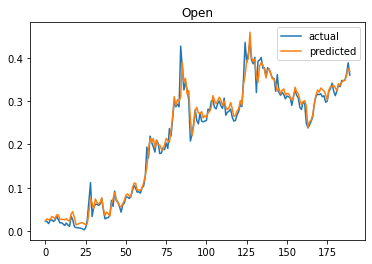

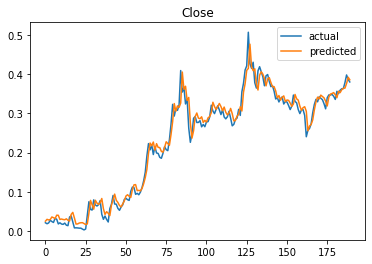

In [141]:
plot_preds(train_pred, train_labels_m)

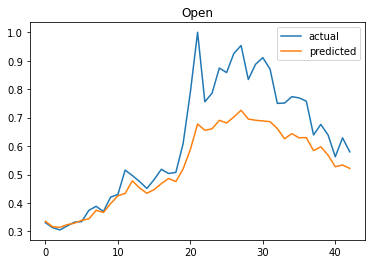

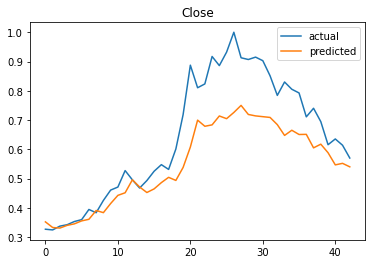

In [142]:
plot_preds(test_pred, test_labels_m)

In [137]:
# Predicting the prices of upcomming 5 days
latest_prediction = []
last_seq = test_seq_m[-1:]

i=0
while i!=5:
    prediction = regressor.predict(last_seq)
    latest_prediction.append(prediction)
    last_seq = np.append(last_seq[0][1:],prediction,axis=0)
    last_seq = last_seq.reshape(test_seq_m[-1:].shape)
    i += 1

In [138]:
import yfinance as yf
mod_future = yf.download('MRNA', 
                      start='2021-01-02', 
                      end='2021-01-10', 
                      progress=False,
).reset_index()
mod_future.drop(columns=['Date','High', 'Low', 'Adj Close', 'Volume'], inplace=True)
mod_predicted = mod_scaler.inverse_transform(np.stack(latest_prediction)[:, 0, :])

In [139]:
mod_future

Open       Close
0  107.230003  111.730003
1  113.820000  109.180000
2  111.110001  116.260002
3  120.099998  115.089996
4  116.519997  112.750000

In [140]:
mod_predicted

array([[99.380356, 97.99037 ],
       [89.54677 , 88.57992 ],
       [83.05866 , 82.34701 ],
       [77.78442 , 77.28218 ],
       [73.80346 , 73.45363 ]], dtype=float32)

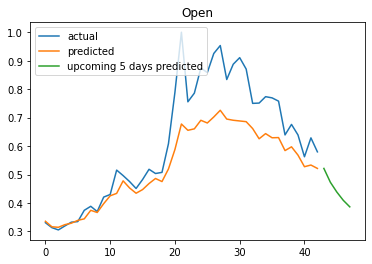

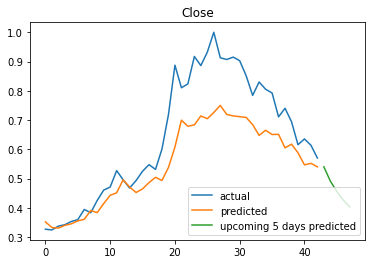

In [144]:
plot_forecast(latest_prediction, test_pred, test_labels_m)

#### BIONTECH

In [141]:
df_bio = createDf('BIONTECH')
df_bio.head()

BIONTECH_Open  BIONTECH_Close
0      35.750000       38.500000
1      38.000000       40.049999
2      40.110001       44.580002
3      47.400002       43.340000
4      44.299999       45.099998

In [142]:
df_bio,bio_scaler = normalizeDf(df_bio)
df_bio.head()

BIONTECH_Open  BIONTECH_Close
0       0.066858        0.098525
1       0.089111        0.113873
2       0.109979        0.158729
3       0.182079        0.146450
4       0.151419        0.163878

In [143]:
df_bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BIONTECH_Open   253 non-null    float64
 1   BIONTECH_Close  253 non-null    float64
dtypes: float64(2)
memory usage: 4.1 KB


In [149]:
train_b, test_b = train_test_splitDf(df_bio)

In [150]:
train_seq_b, train_labels_b = seq_gen(train_b, 'BIONTECH')
test_seq_b, test_labels_b = seq_gen(test_b, 'BIONTECH')

In [152]:
train_seq_b.shape, train_labels_b.shape, test_seq_b.shape, test_labels_b.shape

((190, 10, 2), (190, 2), (43, 10, 2), (43, 2))

In [153]:
# Model training
epochs = 200
batch_size = 8

# fit the network
history = regressor.fit(train_seq_b, train_labels_b, epochs=epochs, batch_size=batch_size, validation_data=(test_seq_b, test_labels_b), verbose=1)


Epoch 1/200
24/24 [==============================] - 1s 31ms/step - loss: 0.0030 - mean_absolute_error: 0.0362 - val_loss: 0.0053 - val_mean_absolute_error: 0.0559
Epoch 2/200
24/24 [==============================] - 1s 25ms/step - loss: 0.0027 - mean_absolute_error: 0.0341 - val_loss: 0.0117 - val_mean_absolute_error: 0.0890
Epoch 3/200
24/24 [==============================] - 1s 26ms/step - loss: 0.0022 - mean_absolute_error: 0.0304 - val_loss: 0.0141 - val_mean_absolute_error: 0.0994
Epoch 4/200
24/24 [==============================] - 1s 27ms/step - loss: 0.0023 - mean_absolute_error: 0.0326 - val_loss: 0.0117 - val_mean_absolute_error: 0.0886
Epoch 5/200
24/24 [==============================] - 1s 28ms/step - loss: 0.0023 - mean_absolute_error: 0.0324 - val_loss: 0.0044 - val_mean_absolute_error: 0.0512
Epoch 6/200
24/24 [==============================] - 1s 26ms/step - loss: 0.0021 - mean_absolute_error: 0.0297 - val_loss: 0.0096 - val_mean_absolute_error: 0.0760
Epoch 7/200
24/2

Epoch 51/200
24/24 [==============================] - 1s 27ms/step - loss: 0.0019 - mean_absolute_error: 0.0317 - val_loss: 0.0175 - val_mean_absolute_error: 0.1089
Epoch 52/200
24/24 [==============================] - 1s 27ms/step - loss: 0.0017 - mean_absolute_error: 0.0314 - val_loss: 0.0159 - val_mean_absolute_error: 0.1035
Epoch 53/200
24/24 [==============================] - 1s 27ms/step - loss: 0.0017 - mean_absolute_error: 0.0305 - val_loss: 0.0138 - val_mean_absolute_error: 0.0931
Epoch 54/200
24/24 [==============================] - 1s 27ms/step - loss: 0.0019 - mean_absolute_error: 0.0312 - val_loss: 0.0145 - val_mean_absolute_error: 0.0982
Epoch 55/200
24/24 [==============================] - 1s 27ms/step - loss: 0.0018 - mean_absolute_error: 0.0311 - val_loss: 0.0137 - val_mean_absolute_error: 0.0947
Epoch 56/200
24/24 [==============================] - 1s 28ms/step - loss: 0.0022 - mean_absolute_error: 0.0325 - val_loss: 0.0208 - val_mean_absolute_error: 0.1213
Epoch 57/2

Epoch 101/200
24/24 [==============================] - 1s 26ms/step - loss: 0.0020 - mean_absolute_error: 0.0306 - val_loss: 0.0084 - val_mean_absolute_error: 0.0700
Epoch 102/200
24/24 [==============================] - 1s 25ms/step - loss: 0.0015 - mean_absolute_error: 0.0293 - val_loss: 0.0150 - val_mean_absolute_error: 0.1008
Epoch 103/200
24/24 [==============================] - 1s 26ms/step - loss: 0.0016 - mean_absolute_error: 0.0292 - val_loss: 0.0173 - val_mean_absolute_error: 0.1075
Epoch 104/200
24/24 [==============================] - 1s 25ms/step - loss: 0.0013 - mean_absolute_error: 0.0266 - val_loss: 0.0151 - val_mean_absolute_error: 0.0972
Epoch 105/200
24/24 [==============================] - 1s 27ms/step - loss: 0.0015 - mean_absolute_error: 0.0285 - val_loss: 0.0136 - val_mean_absolute_error: 0.0910
Epoch 106/200
24/24 [==============================] - 1s 27ms/step - loss: 0.0013 - mean_absolute_error: 0.0272 - val_loss: 0.0141 - val_mean_absolute_error: 0.0938
Epoc

24/24 [==============================] - 1s 27ms/step - loss: 0.0017 - mean_absolute_error: 0.0293 - val_loss: 0.0206 - val_mean_absolute_error: 0.1184
Epoch 151/200
24/24 [==============================] - 1s 26ms/step - loss: 0.0016 - mean_absolute_error: 0.0290 - val_loss: 0.0163 - val_mean_absolute_error: 0.1035
Epoch 152/200
24/24 [==============================] - 1s 27ms/step - loss: 0.0017 - mean_absolute_error: 0.0293 - val_loss: 0.0136 - val_mean_absolute_error: 0.0920
Epoch 153/200
24/24 [==============================] - 1s 27ms/step - loss: 0.0014 - mean_absolute_error: 0.0283 - val_loss: 0.0159 - val_mean_absolute_error: 0.1011
Epoch 154/200
24/24 [==============================] - 1s 27ms/step - loss: 0.0012 - mean_absolute_error: 0.0256 - val_loss: 0.0202 - val_mean_absolute_error: 0.1187
Epoch 155/200
24/24 [==============================] - 1s 26ms/step - loss: 0.0013 - mean_absolute_error: 0.0267 - val_loss: 0.0151 - val_mean_absolute_error: 0.0992
Epoch 156/200
24/2

In [154]:
# Predictions
train_pred = regressor.predict(train_seq_b)
test_pred = regressor.predict(test_seq_b)

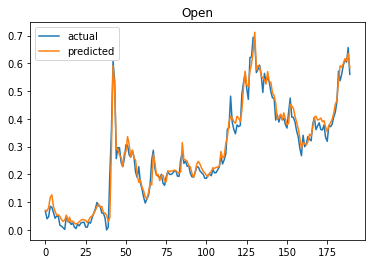

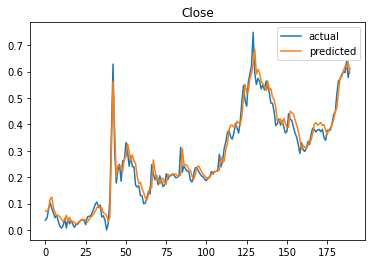

In [153]:
plot_preds(train_pred, train_labels_b)

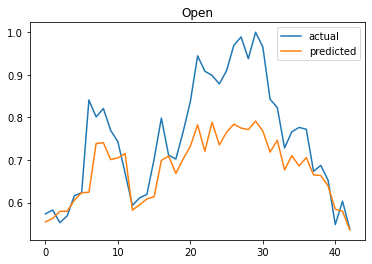

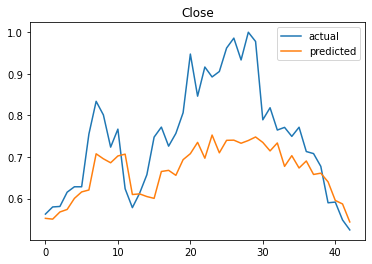

In [154]:
plot_preds(test_pred, test_labels_b)

In [155]:
# Predicting the prices of upcomming 5 days
latest_prediction = []
last_seq = test_seq_b[-1:]

i=0
while i!=5:
    prediction = regressor.predict(last_seq)
    latest_prediction.append(prediction)
    last_seq = np.append(last_seq[0][1:],prediction,axis=0)
    last_seq = last_seq.reshape(test_seq_b[-1:].shape)
    i += 1
    

In [156]:
import yfinance as yf
bio_future = yf.download('BNTX', 
                      start='2021-01-02', 
                      end='2021-01-10', 
                      progress=False,
).reset_index()
bio_future.drop(columns=['Date','High', 'Low', 'Adj Close', 'Volume'], inplace=True)
bio_predicted = mod_scaler.inverse_transform(np.stack(latest_prediction)[:, 0, :])

In [157]:
bio_future

Open       Close
0  85.450996   85.730003
1  87.949997   86.779999
2  86.754997   91.160004
3  94.000000   93.690002
4  98.099998  100.389999

In [158]:
bio_predicted

array([[101.26043 ,  93.143684],
       [ 94.73635 ,  89.19156 ],
       [ 89.84821 ,  85.11494 ],
       [ 86.14247 ,  81.327736],
       [ 82.248535,  78.41743 ]], dtype=float32)

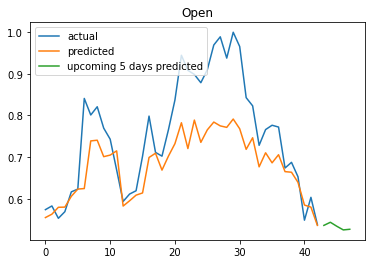

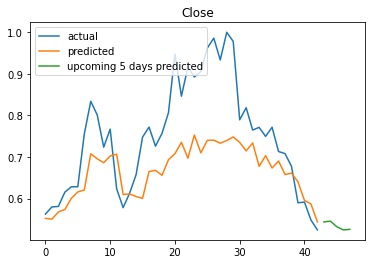

In [156]:
plot_forecast(latest_prediction, test_pred, test_labels_b)

#### NOVAVAX

In [159]:
df_nova = createDf('NOVAVAX')
df_nova.head()

NOVAVAX_Open  NOVAVAX_Close
0          3.99           4.49
1          4.47           4.44
2          4.41           4.58
3          4.60           4.57
4          4.56           4.28

In [160]:
df_nova,nova_scaler = normalizeDf(df_nova)
df_nova.head()

NOVAVAX_Open  NOVAVAX_Close
0      0.000449       0.003208
1      0.003144       0.002921
2      0.002808       0.003723
3      0.003874       0.003666
4      0.003650       0.002005

In [161]:
df_nova.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NOVAVAX_Open   253 non-null    float64
 1   NOVAVAX_Close  253 non-null    float64
dtypes: float64(2)
memory usage: 4.1 KB


In [162]:
train_n, test_n = train_test_splitDf(df_nova)

In [163]:
train_seq_n, train_labels_n = seq_gen(train_n, 'NOVAVAX')
test_seq_n, test_labels_n = seq_gen(test_n, 'NOVAVAX')

In [164]:
train_seq_n.shape, train_labels_n.shape, test_seq_n.shape, test_labels_n.shape

((190, 10, 2), (190, 2), (43, 10, 2), (43, 2))

In [165]:
# Model training
epochs = 200
batch_size = 8

# fit the network
history = regressor.fit(train_seq_n, train_labels_n, epochs=epochs, batch_size=batch_size, validation_data=(test_seq_n, test_labels_n), verbose=1)



Epoch 1/200
24/24 [==============================] - 1s 30ms/step - loss: 0.0034 - mean_absolute_error: 0.0382 - val_loss: 0.0013 - val_mean_absolute_error: 0.0256
Epoch 2/200
24/24 [==============================] - 1s 26ms/step - loss: 0.0017 - mean_absolute_error: 0.0287 - val_loss: 0.0013 - val_mean_absolute_error: 0.0281
Epoch 3/200
24/24 [==============================] - 1s 26ms/step - loss: 0.0023 - mean_absolute_error: 0.0339 - val_loss: 0.0012 - val_mean_absolute_error: 0.0251
Epoch 4/200
24/24 [==============================] - 1s 27ms/step - loss: 0.0023 - mean_absolute_error: 0.0336 - val_loss: 0.0022 - val_mean_absolute_error: 0.0385
Epoch 5/200
24/24 [==============================] - 1s 26ms/step - loss: 0.0017 - mean_absolute_error: 0.0286 - val_loss: 0.0012 - val_mean_absolute_error: 0.0260
Epoch 6/200
24/24 [==============================] - 1s 26ms/step - loss: 0.0022 - mean_absolute_error: 0.0303 - val_loss: 0.0017 - val_mean_absolute_error: 0.0303
Epoch 7/200
24/2

Epoch 51/200
24/24 [==============================] - 1s 29ms/step - loss: 0.0016 - mean_absolute_error: 0.0282 - val_loss: 0.0017 - val_mean_absolute_error: 0.0332
Epoch 52/200
24/24 [==============================] - 1s 30ms/step - loss: 0.0018 - mean_absolute_error: 0.0280 - val_loss: 0.0012 - val_mean_absolute_error: 0.0255
Epoch 53/200
24/24 [==============================] - 1s 27ms/step - loss: 0.0014 - mean_absolute_error: 0.0274 - val_loss: 0.0011 - val_mean_absolute_error: 0.0249
Epoch 54/200
24/24 [==============================] - 1s 30ms/step - loss: 0.0015 - mean_absolute_error: 0.0284 - val_loss: 0.0014 - val_mean_absolute_error: 0.0282
Epoch 55/200
24/24 [==============================] - 1s 30ms/step - loss: 0.0018 - mean_absolute_error: 0.0310 - val_loss: 0.0012 - val_mean_absolute_error: 0.0270
Epoch 56/200
24/24 [==============================] - 1s 31ms/step - loss: 0.0017 - mean_absolute_error: 0.0284 - val_loss: 0.0011 - val_mean_absolute_error: 0.0249
Epoch 57/2

24/24 [==============================] - 1s 31ms/step - loss: 0.0013 - mean_absolute_error: 0.0271 - val_loss: 0.0011 - val_mean_absolute_error: 0.0249
Epoch 150/200
24/24 [==============================] - 1s 30ms/step - loss: 0.0013 - mean_absolute_error: 0.0270 - val_loss: 0.0012 - val_mean_absolute_error: 0.0260
Epoch 151/200
24/24 [==============================] - 1s 29ms/step - loss: 0.0013 - mean_absolute_error: 0.0267 - val_loss: 0.0011 - val_mean_absolute_error: 0.0240
Epoch 152/200
24/24 [==============================] - 1s 29ms/step - loss: 0.0014 - mean_absolute_error: 0.0264 - val_loss: 0.0014 - val_mean_absolute_error: 0.0287
Epoch 153/200
24/24 [==============================] - 1s 31ms/step - loss: 0.0016 - mean_absolute_error: 0.0288 - val_loss: 0.0018 - val_mean_absolute_error: 0.0336
Epoch 154/200
24/24 [==============================] - 1s 29ms/step - loss: 0.0016 - mean_absolute_error: 0.0289 - val_loss: 0.0011 - val_mean_absolute_error: 0.0252
Epoch 155/200
24/2

In [166]:
# Predictions
train_pred = regressor.predict(train_seq_n)
test_pred = regressor.predict(test_seq_n)



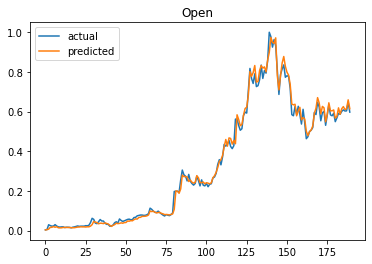

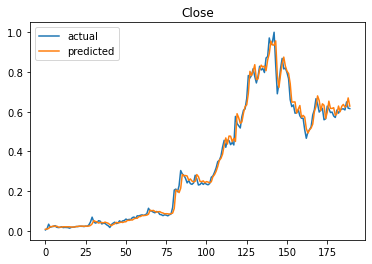

In [165]:
plot_preds(train_pred, train_labels_n)



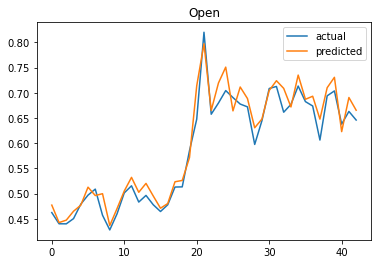

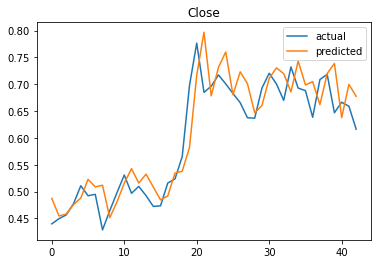

In [166]:
plot_preds(test_pred, test_labels_n)

In [167]:
# Predicting the prices of upcoming 5 days
latest_prediction = []
last_seq = test_seq_n[-1:]

i=0
while i!=5:
    prediction = regressor.predict(last_seq)
    latest_prediction.append(prediction)
    last_seq = np.append(last_seq[0][1:],prediction,axis=0)
    last_seq = last_seq.reshape(test_seq_n[-1:].shape)
    i += 1

In [168]:
import yfinance as yf
nov_future = yf.download('NVAX', 
                      start='2021-01-02', 
                      end='2021-01-10', 
                      progress=False,
).reset_index()
nov_future.drop(columns=['Date','High', 'Low', 'Adj Close', 'Volume'], inplace=True)
nov_predicted = nova_scaler.inverse_transform(np.stack(latest_prediction)[:, 0, :])

In [169]:
nov_future

Open       Close
0  112.699997  112.980003
1  112.010002  116.239998
2  115.510002  123.739998
3  124.800003  128.179993
4  129.940002  121.860001

In [170]:
nov_predicted

array([[120.954025, 120.9409  ],
       [118.68282 , 118.74846 ],
       [122.71262 , 122.64681 ],
       [123.850975, 123.71926 ],
       [126.27378 , 126.11615 ]], dtype=float32)

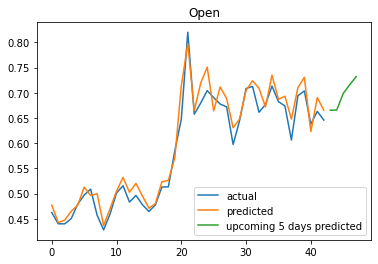

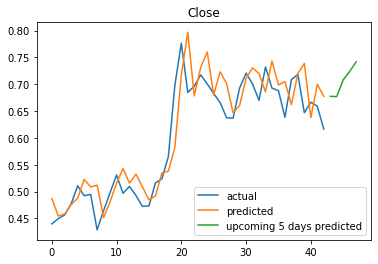

In [168]:
plot_forecast(latest_prediction, test_pred, test_labels_n)

### Bidirectional LSTM

#### PFIZER

In [195]:
# Initializing model
regressor1 = Sequential()
regressor1.add(Bidirectional(LSTM(units = 50, return_sequences = True, input_shape = (10, 2))))
#regressor.add(Dropout(0.2))             

regressor1.add(Bidirectional(LSTM(units = 50, return_sequences = True)))
#regressor.add(Dropout(0.2))

regressor1.add(Bidirectional(LSTM(units = 50)))
regressor1.add(Dropout(0.2))

regressor1.add(Dense(units = 2))


regressor1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
#regressor1.summary()

In [196]:
# Model training
epochs = 200
batch_size = 8

# fit the network
history1 = regressor1.fit(train_seq_p, train_labels_p, epochs=epochs, batch_size=batch_size, validation_data=(test_seq_p, test_labels_p), verbose=1)


Epoch 1/200
24/24 [==============================] - 20s 166ms/step - loss: 0.0465 - mean_absolute_error: 0.1692 - val_loss: 0.0182 - val_mean_absolute_error: 0.0976
Epoch 2/200
24/24 [==============================] - 1s 29ms/step - loss: 0.0116 - mean_absolute_error: 0.0878 - val_loss: 0.0183 - val_mean_absolute_error: 0.0964
Epoch 3/200
24/24 [==============================] - 1s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0710 - val_loss: 0.0213 - val_mean_absolute_error: 0.1071
Epoch 4/200
24/24 [==============================] - 1s 23ms/step - loss: 0.0084 - mean_absolute_error: 0.0718 - val_loss: 0.0155 - val_mean_absolute_error: 0.0908
Epoch 5/200
24/24 [==============================] - 1s 23ms/step - loss: 0.0074 - mean_absolute_error: 0.0678 - val_loss: 0.0128 - val_mean_absolute_error: 0.0851
Epoch 6/200
24/24 [==============================] - 1s 23ms/step - loss: 0.0081 - mean_absolute_error: 0.0715 - val_loss: 0.0220 - val_mean_absolute_error: 0.1142
Epoch 7/200
24

Epoch 51/200
24/24 [==============================] - 1s 49ms/step - loss: 0.0032 - mean_absolute_error: 0.0444 - val_loss: 0.0052 - val_mean_absolute_error: 0.0500
Epoch 52/200
24/24 [==============================] - 1s 31ms/step - loss: 0.0035 - mean_absolute_error: 0.0457 - val_loss: 0.0051 - val_mean_absolute_error: 0.0495
Epoch 53/200
24/24 [==============================] - 1s 38ms/step - loss: 0.0028 - mean_absolute_error: 0.0410 - val_loss: 0.0052 - val_mean_absolute_error: 0.0500
Epoch 54/200
24/24 [==============================] - 1s 42ms/step - loss: 0.0030 - mean_absolute_error: 0.0410 - val_loss: 0.0114 - val_mean_absolute_error: 0.0852
Epoch 55/200
24/24 [==============================] - 1s 54ms/step - loss: 0.0031 - mean_absolute_error: 0.0443 - val_loss: 0.0070 - val_mean_absolute_error: 0.0602
Epoch 56/200
24/24 [==============================] - 1s 51ms/step - loss: 0.0030 - mean_absolute_error: 0.0426 - val_loss: 0.0042 - val_mean_absolute_error: 0.0498
Epoch 57/2

Epoch 101/200
24/24 [==============================] - 1s 22ms/step - loss: 0.0028 - mean_absolute_error: 0.0400 - val_loss: 0.0046 - val_mean_absolute_error: 0.0473
Epoch 102/200
24/24 [==============================] - 1s 22ms/step - loss: 0.0035 - mean_absolute_error: 0.0459 - val_loss: 0.0057 - val_mean_absolute_error: 0.0520
Epoch 103/200
24/24 [==============================] - 1s 22ms/step - loss: 0.0028 - mean_absolute_error: 0.0420 - val_loss: 0.0103 - val_mean_absolute_error: 0.0804
Epoch 104/200
24/24 [==============================] - 1s 23ms/step - loss: 0.0025 - mean_absolute_error: 0.0378 - val_loss: 0.0096 - val_mean_absolute_error: 0.0765
Epoch 105/200
24/24 [==============================] - 1s 25ms/step - loss: 0.0026 - mean_absolute_error: 0.0394 - val_loss: 0.0046 - val_mean_absolute_error: 0.0459
Epoch 106/200
24/24 [==============================] - 1s 26ms/step - loss: 0.0020 - mean_absolute_error: 0.0344 - val_loss: 0.0060 - val_mean_absolute_error: 0.0552
Epoc

24/24 [==============================] - 1s 23ms/step - loss: 0.0024 - mean_absolute_error: 0.0375 - val_loss: 0.0038 - val_mean_absolute_error: 0.0400
Epoch 200/200
24/24 [==============================] - 1s 22ms/step - loss: 0.0021 - mean_absolute_error: 0.0343 - val_loss: 0.0066 - val_mean_absolute_error: 0.0611


In [197]:
# Predictions
train_pred1 = regressor1.predict(train_seq_p)
test_pred1 = regressor1.predict(test_seq_p)

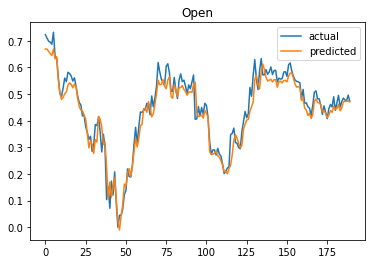

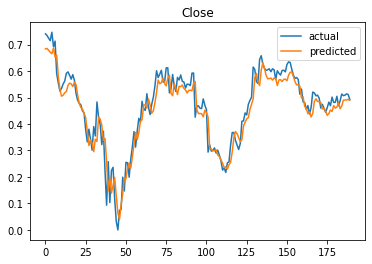

In [198]:
plot_preds(train_pred1, train_labels_p)

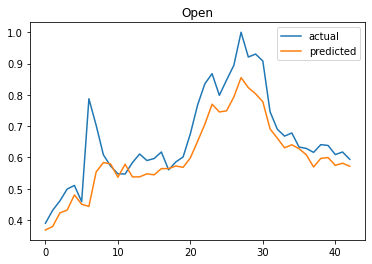

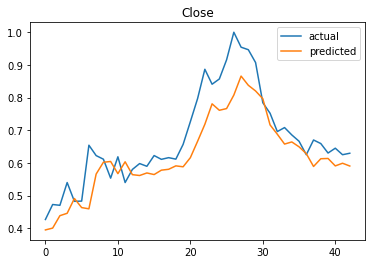

In [199]:
plot_preds(test_pred1, test_labels_p)

In [200]:
# Predicting the prices of upcoming 5 days
latest_prediction = []
last_seq = test_seq_p[-1:]

i=0
while i!=5:
    prediction = regressor1.predict(last_seq)
    latest_prediction.append(prediction)
    last_seq = np.append(last_seq[0][1:],prediction,axis=0)
    last_seq = last_seq.reshape(test_seq_p[-1:].shape)
    i += 1

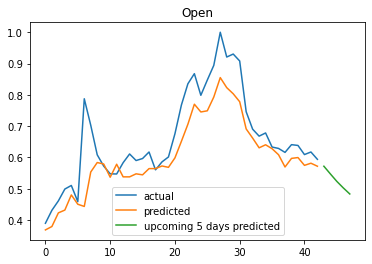

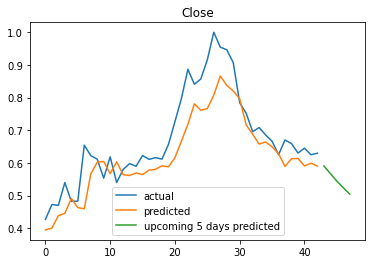

In [201]:
plot_forecast(latest_prediction, test_pred1, test_labels_p)

#### ASTRAZENECA

In [202]:
# Model training
epochs = 200
batch_size = 8

# fit the network
history1 = regressor1.fit(train_seq_a, train_labels_a, epochs=epochs, batch_size=batch_size, validation_data=(test_seq_a, test_labels_a), verbose=1)



Epoch 1/200
24/24 [==============================] - 1s 23ms/step - loss: 0.0025 - mean_absolute_error: 0.0376 - val_loss: 0.0022 - val_mean_absolute_error: 0.0334
Epoch 2/200
24/24 [==============================] - 1s 22ms/step - loss: 0.0026 - mean_absolute_error: 0.0378 - val_loss: 0.0032 - val_mean_absolute_error: 0.0433
Epoch 3/200
24/24 [==============================] - 1s 22ms/step - loss: 0.0024 - mean_absolute_error: 0.0365 - val_loss: 0.0026 - val_mean_absolute_error: 0.0377
Epoch 4/200
24/24 [==============================] - 1s 23ms/step - loss: 0.0025 - mean_absolute_error: 0.0375 - val_loss: 0.0025 - val_mean_absolute_error: 0.0372
Epoch 5/200
24/24 [==============================] - 1s 25ms/step - loss: 0.0027 - mean_absolute_error: 0.0397 - val_loss: 0.0022 - val_mean_absolute_error: 0.0343
Epoch 6/200
24/24 [==============================] - 1s 27ms/step - loss: 0.0027 - mean_absolute_error: 0.0393 - val_loss: 0.0025 - val_mean_absolute_error: 0.0367
Epoch 7/200
24/2

Epoch 51/200
24/24 [==============================] - 1s 22ms/step - loss: 0.0023 - mean_absolute_error: 0.0360 - val_loss: 0.0023 - val_mean_absolute_error: 0.0346
Epoch 52/200
24/24 [==============================] - 1s 22ms/step - loss: 0.0023 - mean_absolute_error: 0.0367 - val_loss: 0.0023 - val_mean_absolute_error: 0.0354
Epoch 53/200
24/24 [==============================] - 1s 26ms/step - loss: 0.0023 - mean_absolute_error: 0.0362 - val_loss: 0.0022 - val_mean_absolute_error: 0.0333
Epoch 54/200
24/24 [==============================] - 1s 21ms/step - loss: 0.0022 - mean_absolute_error: 0.0346 - val_loss: 0.0025 - val_mean_absolute_error: 0.0376
Epoch 55/200
24/24 [==============================] - 1s 22ms/step - loss: 0.0027 - mean_absolute_error: 0.0390 - val_loss: 0.0034 - val_mean_absolute_error: 0.0448
Epoch 56/200
24/24 [==============================] - 1s 23ms/step - loss: 0.0023 - mean_absolute_error: 0.0369 - val_loss: 0.0026 - val_mean_absolute_error: 0.0379
Epoch 57/2

24/24 [==============================] - 1s 26ms/step - loss: 0.0024 - mean_absolute_error: 0.0378 - val_loss: 0.0022 - val_mean_absolute_error: 0.0346
Epoch 150/200
24/24 [==============================] - 1s 25ms/step - loss: 0.0022 - mean_absolute_error: 0.0344 - val_loss: 0.0025 - val_mean_absolute_error: 0.0376
Epoch 151/200
24/24 [==============================] - 1s 26ms/step - loss: 0.0022 - mean_absolute_error: 0.0359 - val_loss: 0.0030 - val_mean_absolute_error: 0.0416
Epoch 152/200
24/24 [==============================] - 1s 25ms/step - loss: 0.0020 - mean_absolute_error: 0.0338 - val_loss: 0.0021 - val_mean_absolute_error: 0.0341
Epoch 153/200
24/24 [==============================] - 1s 22ms/step - loss: 0.0019 - mean_absolute_error: 0.0317 - val_loss: 0.0029 - val_mean_absolute_error: 0.0412
Epoch 154/200
24/24 [==============================] - 1s 23ms/step - loss: 0.0019 - mean_absolute_error: 0.0333 - val_loss: 0.0022 - val_mean_absolute_error: 0.0342
Epoch 155/200
24/2

In [203]:
# Predictions
train_pred1 = regressor1.predict(train_seq_a)
test_pred1 = regressor1.predict(test_seq_a)

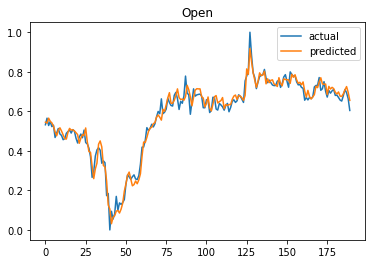

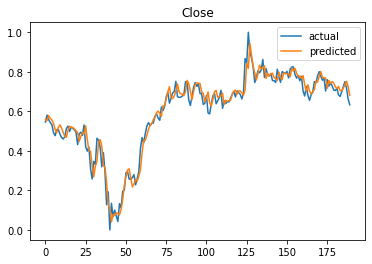

In [204]:
plot_preds(train_pred1, train_labels_a)

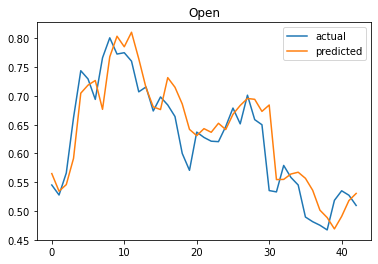

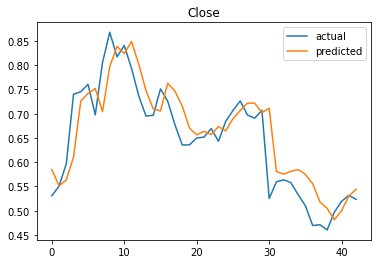

In [205]:
plot_preds(test_pred1, test_labels_a)

In [206]:
# Predicting the prices of upcoming 5 days
latest_prediction = []
last_seq = test_seq_a[-1:]

i=0
while i!=5:
    prediction = regressor1.predict(last_seq)
    latest_prediction.append(prediction)
    last_seq = np.append(last_seq[0][1:],prediction,axis=0)
    last_seq = last_seq.reshape(test_seq_a[-1:].shape)
    i += 1

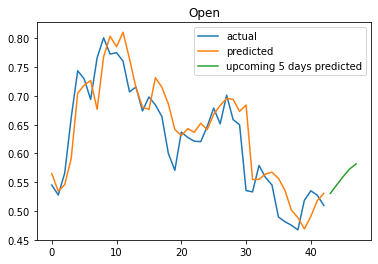

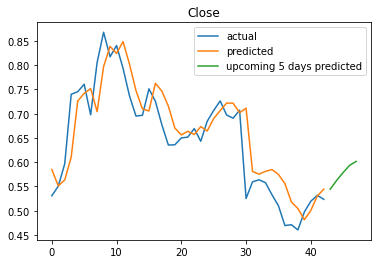

In [207]:
plot_forecast(latest_prediction, test_pred1, test_labels_a)

#### MODERNA

In [208]:
# Model training
epochs = 200
batch_size = 8

# fit the network
history1 = regressor1.fit(train_seq_m, train_labels_m, epochs=epochs, batch_size=batch_size, validation_data=(test_seq_m, test_labels_m), verbose=1)



Epoch 1/200
24/24 [==============================] - 1s 24ms/step - loss: 9.7822e-04 - mean_absolute_error: 0.0230 - val_loss: 0.0048 - val_mean_absolute_error: 0.0475
Epoch 2/200
24/24 [==============================] - 1s 22ms/step - loss: 9.4124e-04 - mean_absolute_error: 0.0230 - val_loss: 0.0047 - val_mean_absolute_error: 0.0472
Epoch 3/200
24/24 [==============================] - 1s 22ms/step - loss: 7.2133e-04 - mean_absolute_error: 0.0199 - val_loss: 0.0050 - val_mean_absolute_error: 0.0489
Epoch 4/200
24/24 [==============================] - 1s 21ms/step - loss: 0.0010 - mean_absolute_error: 0.0237 - val_loss: 0.0057 - val_mean_absolute_error: 0.0524
Epoch 5/200
24/24 [==============================] - 1s 21ms/step - loss: 7.7480e-04 - mean_absolute_error: 0.0200 - val_loss: 0.0052 - val_mean_absolute_error: 0.0501
Epoch 6/200
24/24 [==============================] - 1s 22ms/step - loss: 6.4093e-04 - mean_absolute_error: 0.0185 - val_loss: 0.0047 - val_mean_absolute_error: 0.0

24/24 [==============================] - 1s 26ms/step - loss: 4.2562e-04 - mean_absolute_error: 0.0141 - val_loss: 0.0125 - val_mean_absolute_error: 0.0874
Epoch 98/200
24/24 [==============================] - 1s 25ms/step - loss: 4.4935e-04 - mean_absolute_error: 0.0147 - val_loss: 0.0122 - val_mean_absolute_error: 0.0852
Epoch 99/200
24/24 [==============================] - 1s 28ms/step - loss: 4.5040e-04 - mean_absolute_error: 0.0147 - val_loss: 0.0099 - val_mean_absolute_error: 0.0752
Epoch 100/200
24/24 [==============================] - 1s 27ms/step - loss: 4.7083e-04 - mean_absolute_error: 0.0153 - val_loss: 0.0129 - val_mean_absolute_error: 0.0886
Epoch 101/200
24/24 [==============================] - 1s 28ms/step - loss: 4.5996e-04 - mean_absolute_error: 0.0154 - val_loss: 0.0149 - val_mean_absolute_error: 0.0995
Epoch 102/200
24/24 [==============================] - 1s 27ms/step - loss: 4.7738e-04 - mean_absolute_error: 0.0153 - val_loss: 0.0105 - val_mean_absolute_error: 0.0

24/24 [==============================] - 1s 27ms/step - loss: 4.1700e-04 - mean_absolute_error: 0.0141 - val_loss: 0.0118 - val_mean_absolute_error: 0.0811
Epoch 194/200
24/24 [==============================] - 1s 29ms/step - loss: 4.1802e-04 - mean_absolute_error: 0.0139 - val_loss: 0.0135 - val_mean_absolute_error: 0.0889
Epoch 195/200
24/24 [==============================] - 1s 28ms/step - loss: 4.2711e-04 - mean_absolute_error: 0.0148 - val_loss: 0.0119 - val_mean_absolute_error: 0.0811
Epoch 196/200
24/24 [==============================] - 1s 30ms/step - loss: 4.2268e-04 - mean_absolute_error: 0.0150 - val_loss: 0.0134 - val_mean_absolute_error: 0.0875
Epoch 197/200
24/24 [==============================] - 1s 22ms/step - loss: 4.2616e-04 - mean_absolute_error: 0.0146 - val_loss: 0.0120 - val_mean_absolute_error: 0.0817
Epoch 198/200
24/24 [==============================] - 1s 22ms/step - loss: 4.2350e-04 - mean_absolute_error: 0.0146 - val_loss: 0.0124 - val_mean_absolute_error: 0

In [209]:
# Predictions
train_pred1 = regressor1.predict(train_seq_m)
test_pred1 = regressor1.predict(test_seq_m)

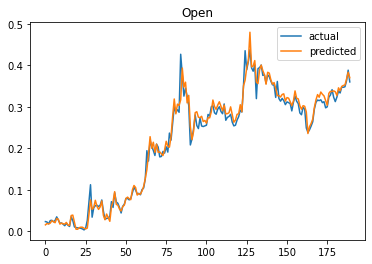

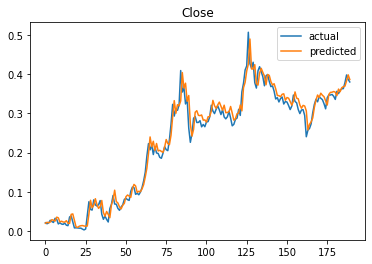

In [210]:
plot_preds(train_pred1, train_labels_m)

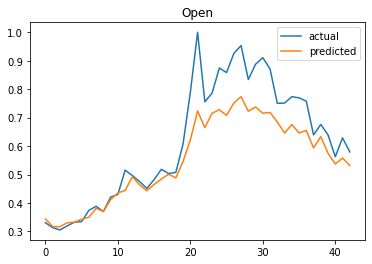

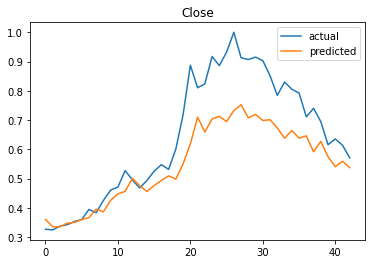

In [211]:
plot_preds(test_pred1, test_labels_m)

In [212]:
# Predicting the prices of upcoming 5 days
latest_prediction = []
last_seq = test_seq_m[-1:]

i=0
while i!=5:
    prediction = regressor1.predict(last_seq)
    latest_prediction.append(prediction)
    last_seq = np.append(last_seq[0][1:],prediction,axis=0)
    last_seq = last_seq.reshape(test_seq_m[-1:].shape)
    i += 1

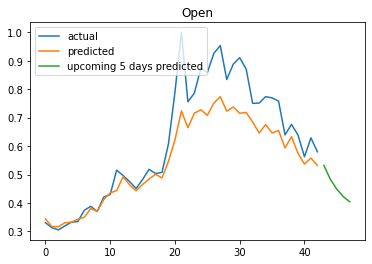

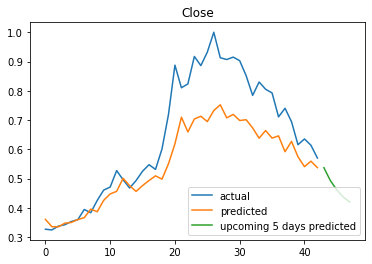

In [213]:
plot_forecast(latest_prediction, test_pred1, test_labels_m)

#### BIONTECH

In [214]:
# Model training
epochs = 200
batch_size = 8

# fit the network
history1 = regressor1.fit(train_seq_b, train_labels_b, epochs=epochs, batch_size=batch_size, validation_data=(test_seq_b, test_labels_b), verbose=1)



Epoch 1/200
24/24 [==============================] - 1s 28ms/step - loss: 0.0024 - mean_absolute_error: 0.0336 - val_loss: 0.0103 - val_mean_absolute_error: 0.0811
Epoch 2/200
24/24 [==============================] - 1s 22ms/step - loss: 0.0022 - mean_absolute_error: 0.0310 - val_loss: 0.0051 - val_mean_absolute_error: 0.0539
Epoch 3/200
24/24 [==============================] - 1s 21ms/step - loss: 0.0025 - mean_absolute_error: 0.0318 - val_loss: 0.0124 - val_mean_absolute_error: 0.0918
Epoch 4/200
24/24 [==============================] - 1s 21ms/step - loss: 0.0020 - mean_absolute_error: 0.0295 - val_loss: 0.0066 - val_mean_absolute_error: 0.0607
Epoch 5/200
24/24 [==============================] - 1s 22ms/step - loss: 0.0021 - mean_absolute_error: 0.0301 - val_loss: 0.0111 - val_mean_absolute_error: 0.0854
Epoch 6/200
24/24 [==============================] - 1s 21ms/step - loss: 0.0018 - mean_absolute_error: 0.0281 - val_loss: 0.0099 - val_mean_absolute_error: 0.0784
Epoch 7/200
24/2

Epoch 51/200
24/24 [==============================] - 1s 22ms/step - loss: 0.0011 - mean_absolute_error: 0.0247 - val_loss: 0.0221 - val_mean_absolute_error: 0.1242
Epoch 52/200
24/24 [==============================] - 1s 24ms/step - loss: 0.0012 - mean_absolute_error: 0.0244 - val_loss: 0.0211 - val_mean_absolute_error: 0.1207
Epoch 53/200
24/24 [==============================] - 1s 27ms/step - loss: 0.0012 - mean_absolute_error: 0.0254 - val_loss: 0.0174 - val_mean_absolute_error: 0.1071
Epoch 54/200
24/24 [==============================] - 1s 23ms/step - loss: 0.0013 - mean_absolute_error: 0.0263 - val_loss: 0.0132 - val_mean_absolute_error: 0.0879
Epoch 55/200
24/24 [==============================] - 1s 22ms/step - loss: 0.0011 - mean_absolute_error: 0.0240 - val_loss: 0.0123 - val_mean_absolute_error: 0.0841
Epoch 56/200
24/24 [==============================] - 1s 22ms/step - loss: 0.0011 - mean_absolute_error: 0.0246 - val_loss: 0.0212 - val_mean_absolute_error: 0.1175
Epoch 57/2

24/24 [==============================] - 1s 23ms/step - loss: 0.0011 - mean_absolute_error: 0.0240 - val_loss: 0.0198 - val_mean_absolute_error: 0.1109
Epoch 101/200
24/24 [==============================] - 1s 22ms/step - loss: 9.7977e-04 - mean_absolute_error: 0.0227 - val_loss: 0.0221 - val_mean_absolute_error: 0.1194
Epoch 102/200
24/24 [==============================] - 1s 22ms/step - loss: 0.0011 - mean_absolute_error: 0.0239 - val_loss: 0.0273 - val_mean_absolute_error: 0.1363
Epoch 103/200
24/24 [==============================] - 1s 22ms/step - loss: 0.0011 - mean_absolute_error: 0.0227 - val_loss: 0.0156 - val_mean_absolute_error: 0.0935
Epoch 104/200
24/24 [==============================] - 1s 22ms/step - loss: 0.0011 - mean_absolute_error: 0.0251 - val_loss: 0.0255 - val_mean_absolute_error: 0.1335
Epoch 105/200
24/24 [==============================] - 1s 22ms/step - loss: 9.5572e-04 - mean_absolute_error: 0.0224 - val_loss: 0.0203 - val_mean_absolute_error: 0.1104
Epoch 106/

24/24 [==============================] - 1s 22ms/step - loss: 8.7062e-04 - mean_absolute_error: 0.0225 - val_loss: 0.0391 - val_mean_absolute_error: 0.1623
Epoch 197/200
24/24 [==============================] - 1s 22ms/step - loss: 8.2872e-04 - mean_absolute_error: 0.0217 - val_loss: 0.0411 - val_mean_absolute_error: 0.1676
Epoch 198/200
24/24 [==============================] - 1s 22ms/step - loss: 7.4162e-04 - mean_absolute_error: 0.0203 - val_loss: 0.0392 - val_mean_absolute_error: 0.1622
Epoch 199/200
24/24 [==============================] - 1s 22ms/step - loss: 7.5758e-04 - mean_absolute_error: 0.0207 - val_loss: 0.0420 - val_mean_absolute_error: 0.1716
Epoch 200/200
24/24 [==============================] - 1s 22ms/step - loss: 8.0735e-04 - mean_absolute_error: 0.0210 - val_loss: 0.0371 - val_mean_absolute_error: 0.1562


In [216]:
# Predictions
train_pred1 = regressor1.predict(train_seq_b)
test_pred1 = regressor1.predict(test_seq_b)

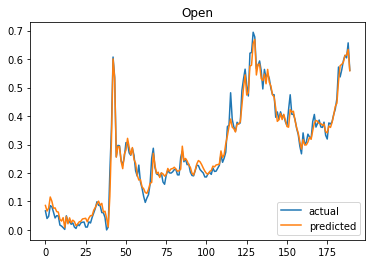

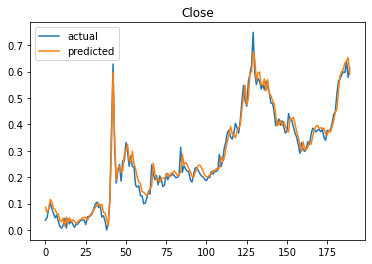

In [217]:
plot_preds(train_pred1, train_labels_b)

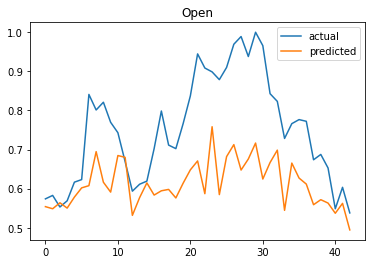

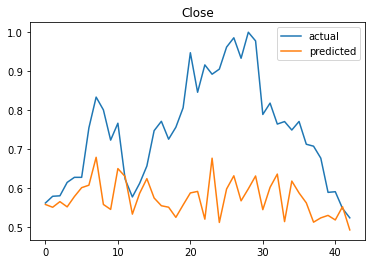

In [218]:
plot_preds(test_pred1, test_labels_b)

In [219]:
# Predicting the prices of upcoming 5 days
latest_prediction = []
last_seq = test_seq_b[-1:]

i=0
while i!=5:
    prediction = regressor1.predict(last_seq)
    latest_prediction.append(prediction)
    last_seq = np.append(last_seq[0][1:],prediction,axis=0)
    last_seq = last_seq.reshape(test_seq_b[-1:].shape)
    i += 1

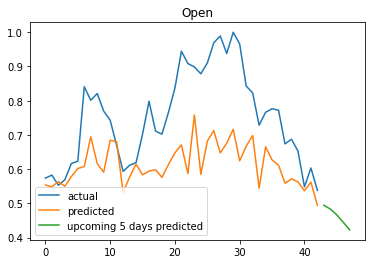

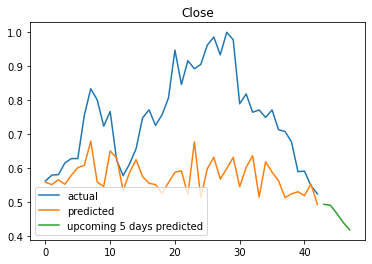

In [220]:
plot_forecast(latest_prediction, test_pred1, test_labels_b)

#### NOVAVAX

In [221]:
# Model training
epochs = 200
batch_size = 8

# fit the network
history1 = regressor1.fit(train_seq_n, train_labels_n, epochs=epochs, batch_size=batch_size, validation_data=(test_seq_n, test_labels_n), verbose=1)



Epoch 1/200
24/24 [==============================] - 1s 25ms/step - loss: 0.0027 - mean_absolute_error: 0.0323 - val_loss: 0.0041 - val_mean_absolute_error: 0.0524
Epoch 2/200
24/24 [==============================] - 1s 25ms/step - loss: 0.0022 - mean_absolute_error: 0.0330 - val_loss: 0.0059 - val_mean_absolute_error: 0.0686
Epoch 3/200
24/24 [==============================] - 1s 24ms/step - loss: 0.0020 - mean_absolute_error: 0.0308 - val_loss: 0.0011 - val_mean_absolute_error: 0.0242
Epoch 4/200
24/24 [==============================] - 1s 26ms/step - loss: 0.0020 - mean_absolute_error: 0.0274 - val_loss: 0.0012 - val_mean_absolute_error: 0.0249
Epoch 5/200
24/24 [==============================] - 1s 23ms/step - loss: 0.0013 - mean_absolute_error: 0.0251 - val_loss: 0.0023 - val_mean_absolute_error: 0.0377
Epoch 6/200
24/24 [==============================] - 1s 23ms/step - loss: 0.0014 - mean_absolute_error: 0.0262 - val_loss: 0.0020 - val_mean_absolute_error: 0.0364
Epoch 7/200
24/2

24/24 [==============================] - 1s 29ms/step - loss: 9.5156e-04 - mean_absolute_error: 0.0215 - val_loss: 0.0010 - val_mean_absolute_error: 0.0238
Epoch 100/200
24/24 [==============================] - 1s 28ms/step - loss: 0.0010 - mean_absolute_error: 0.0218 - val_loss: 0.0011 - val_mean_absolute_error: 0.0242
Epoch 101/200
24/24 [==============================] - 1s 24ms/step - loss: 8.6375e-04 - mean_absolute_error: 0.0213 - val_loss: 0.0012 - val_mean_absolute_error: 0.0274
Epoch 102/200
24/24 [==============================] - 1s 23ms/step - loss: 0.0010 - mean_absolute_error: 0.0216 - val_loss: 0.0011 - val_mean_absolute_error: 0.0247
Epoch 103/200
24/24 [==============================] - 1s 24ms/step - loss: 9.9805e-04 - mean_absolute_error: 0.0218 - val_loss: 0.0016 - val_mean_absolute_error: 0.0304
Epoch 104/200
24/24 [==============================] - 1s 24ms/step - loss: 0.0011 - mean_absolute_error: 0.0224 - val_loss: 0.0011 - val_mean_absolute_error: 0.0238
Epoch 

24/24 [==============================] - 1s 23ms/step - loss: 8.9864e-04 - mean_absolute_error: 0.0215 - val_loss: 0.0012 - val_mean_absolute_error: 0.0259
Epoch 196/200
24/24 [==============================] - 1s 22ms/step - loss: 9.1106e-04 - mean_absolute_error: 0.0212 - val_loss: 0.0013 - val_mean_absolute_error: 0.0273
Epoch 197/200
24/24 [==============================] - 1s 22ms/step - loss: 7.6513e-04 - mean_absolute_error: 0.0202 - val_loss: 0.0014 - val_mean_absolute_error: 0.0285
Epoch 198/200
24/24 [==============================] - 1s 22ms/step - loss: 8.3996e-04 - mean_absolute_error: 0.0207 - val_loss: 0.0013 - val_mean_absolute_error: 0.0286
Epoch 199/200
24/24 [==============================] - 1s 23ms/step - loss: 9.1745e-04 - mean_absolute_error: 0.0228 - val_loss: 0.0012 - val_mean_absolute_error: 0.0257
Epoch 200/200
24/24 [==============================] - 1s 23ms/step - loss: 8.1073e-04 - mean_absolute_error: 0.0200 - val_loss: 0.0011 - val_mean_absolute_error: 0

In [223]:
# Predictions
train_pred1 = regressor1.predict(train_seq_n)
test_pred1 = regressor1.predict(test_seq_n)

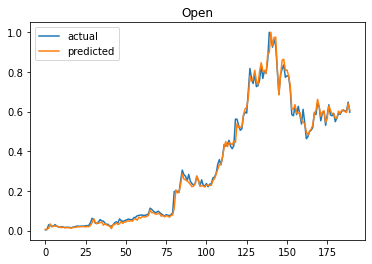

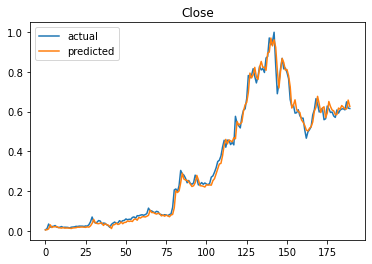

In [224]:
plot_preds(train_pred1, train_labels_n)

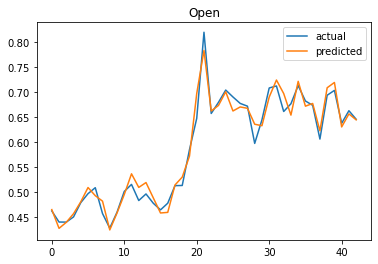

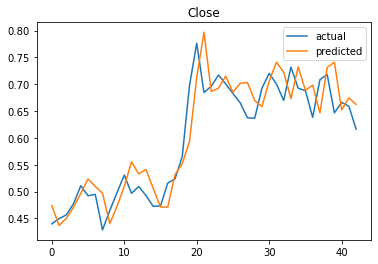

In [225]:
plot_preds(test_pred1, test_labels_n)

In [226]:
# Predicting the prices of upcoming 5 days
latest_prediction = []
last_seq = test_seq_n[-1:]

i=0
while i!=5:
    prediction = regressor1.predict(last_seq)
    latest_prediction.append(prediction)
    last_seq = np.append(last_seq[0][1:],prediction,axis=0)
    last_seq = last_seq.reshape(test_seq_n[-1:].shape)
    i += 1

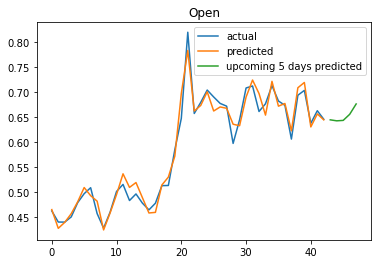

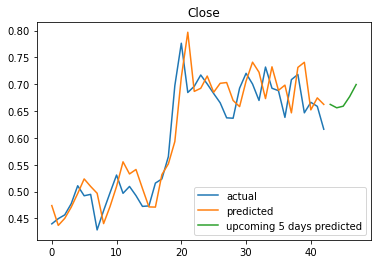

In [227]:
plot_forecast(latest_prediction, test_pred1, test_labels_n)